In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from itertools import combinations

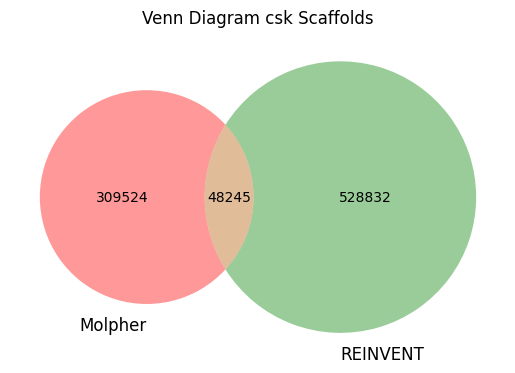

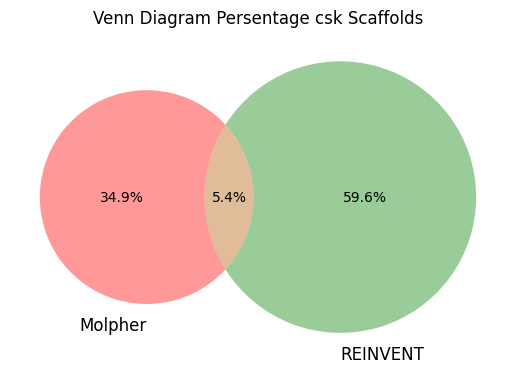

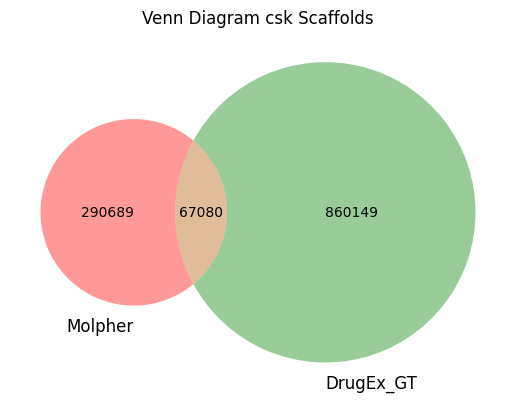

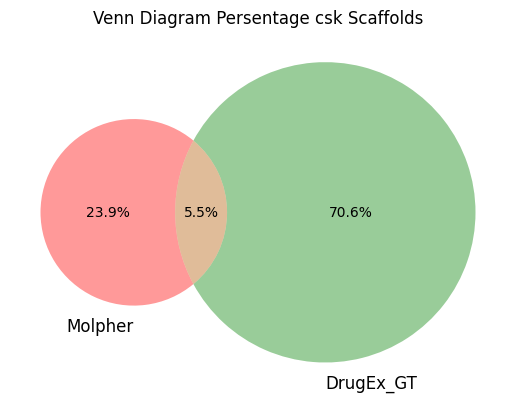

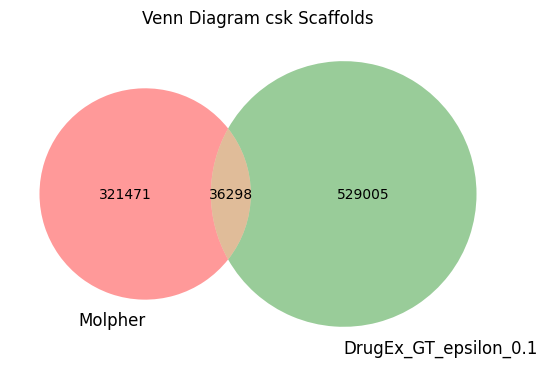

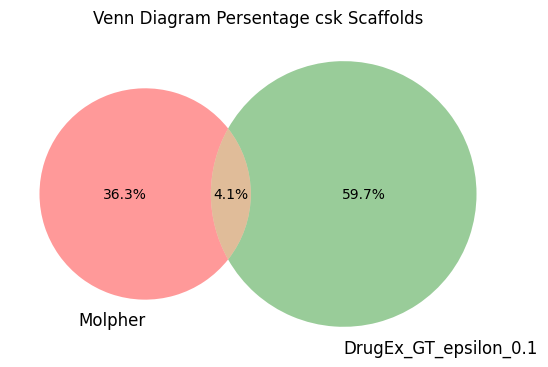

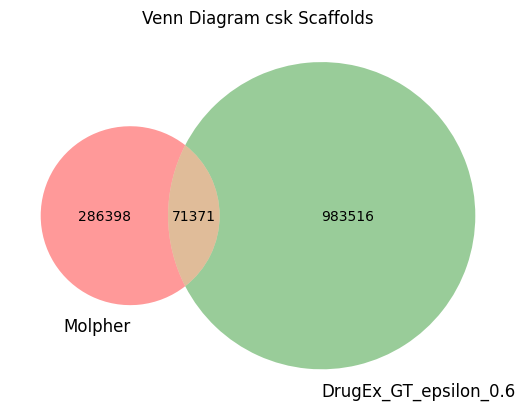

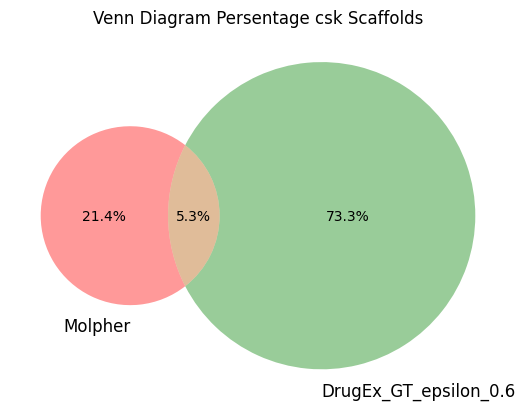

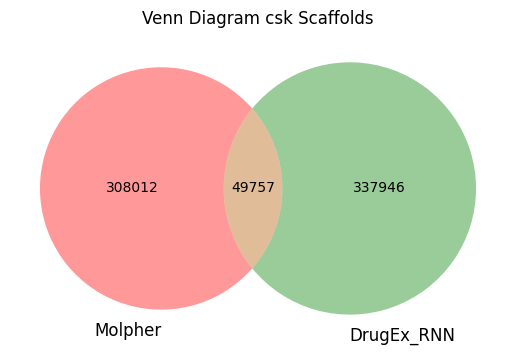

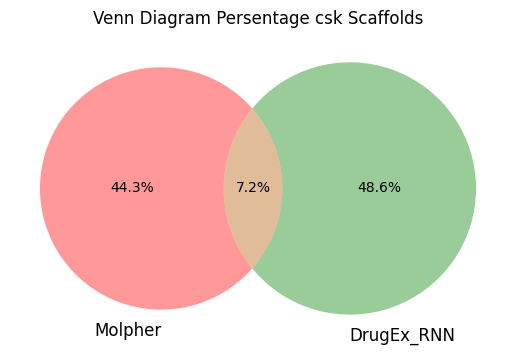

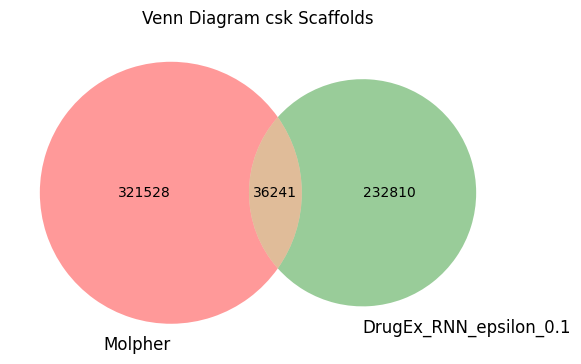

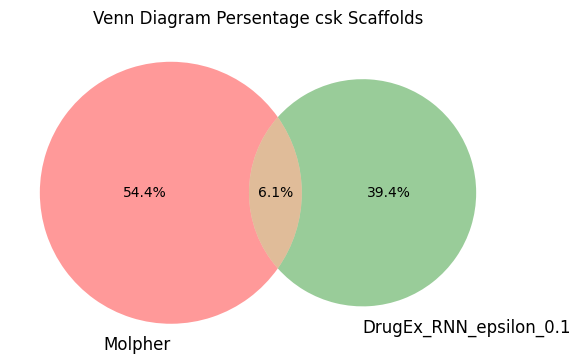

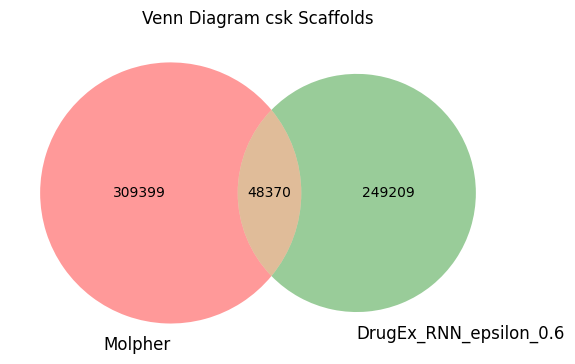

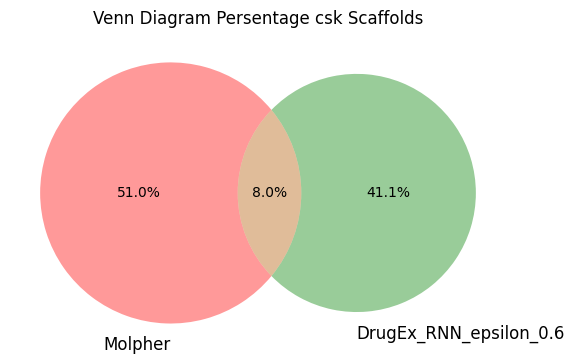

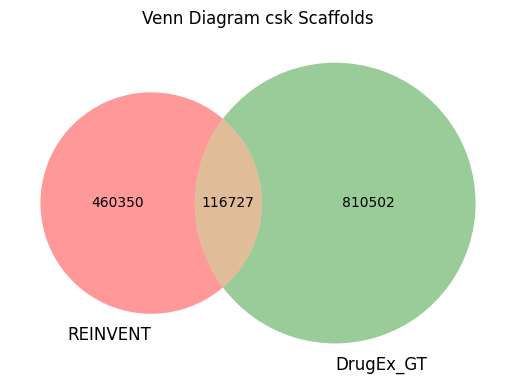

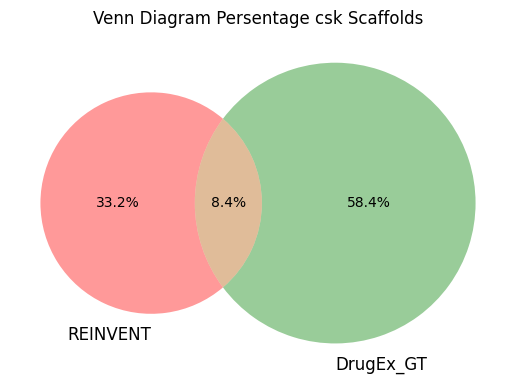

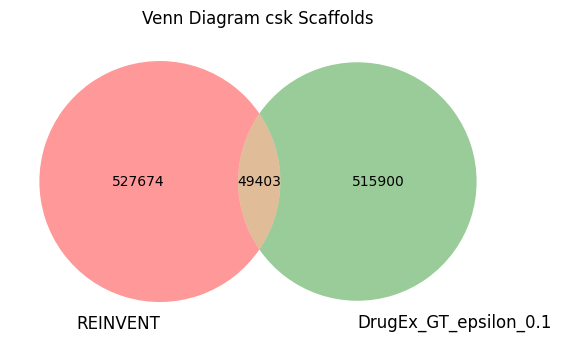

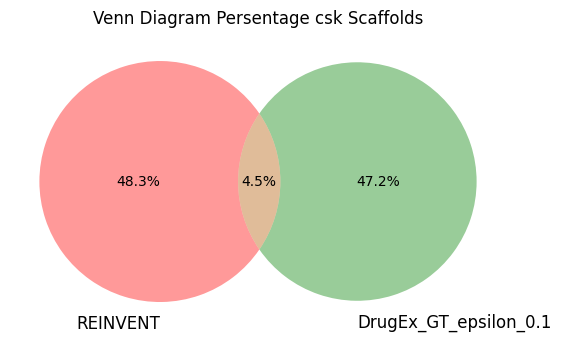

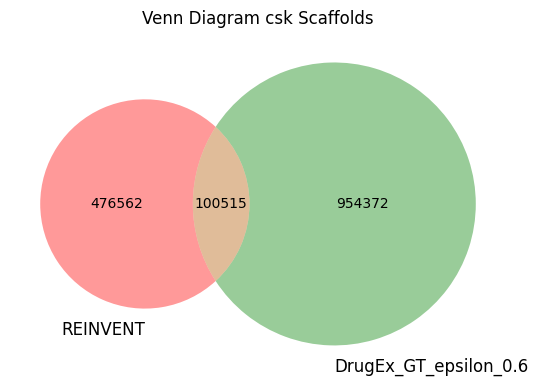

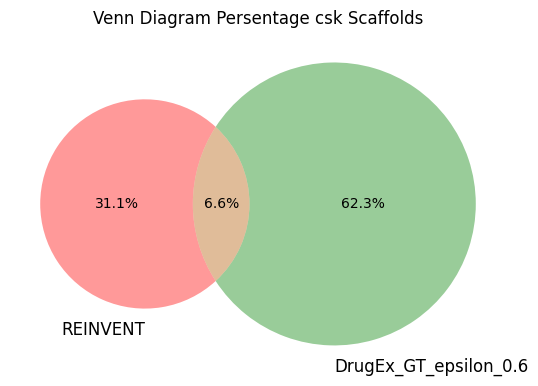

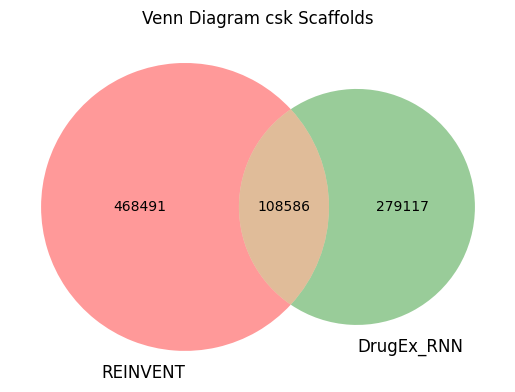

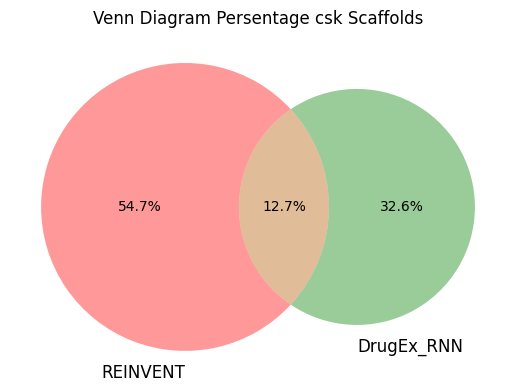

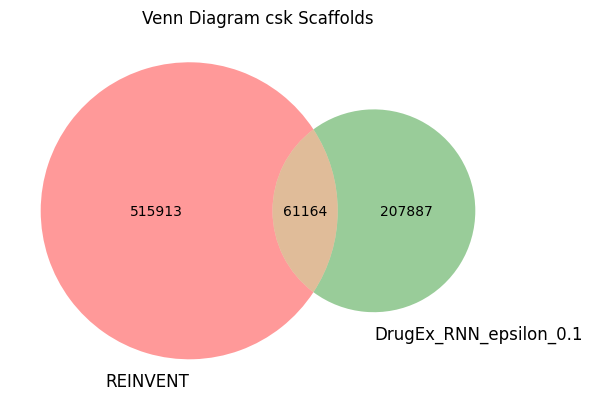

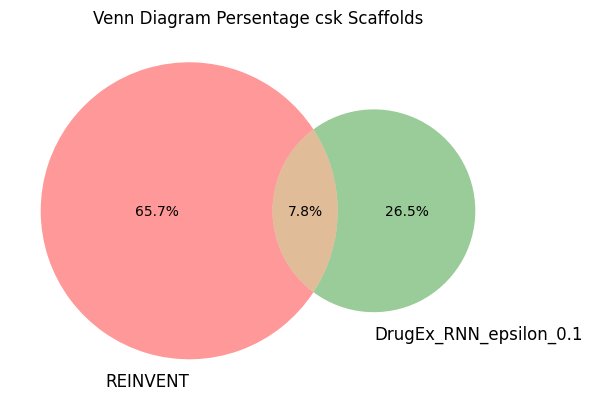

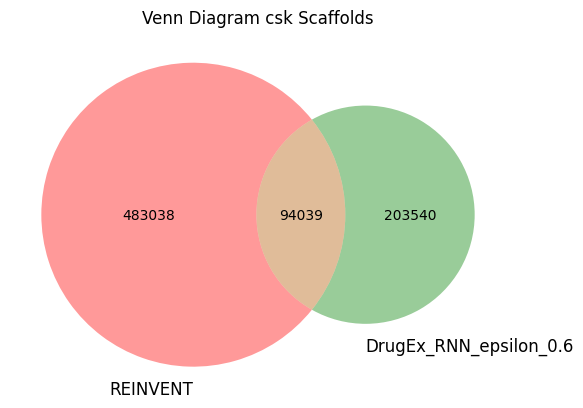

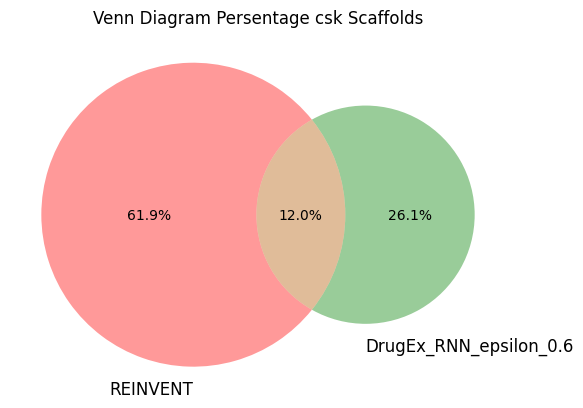

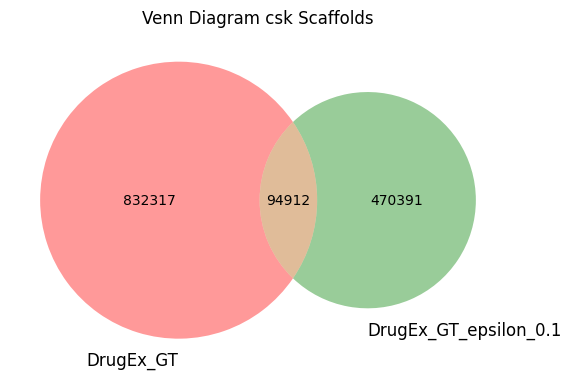

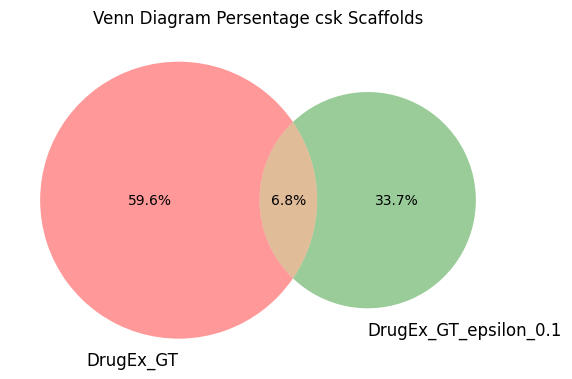

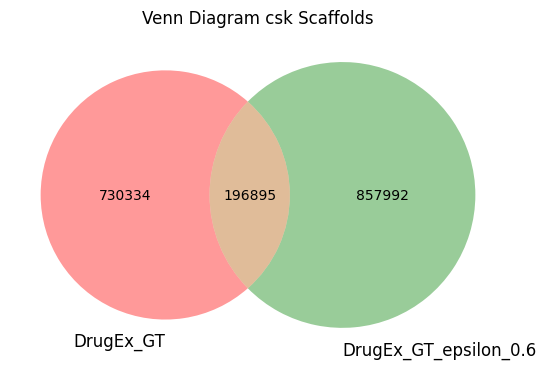

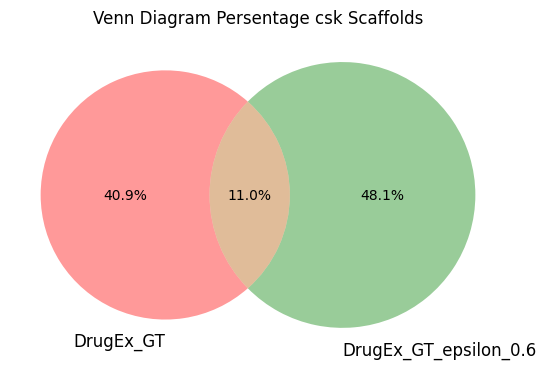

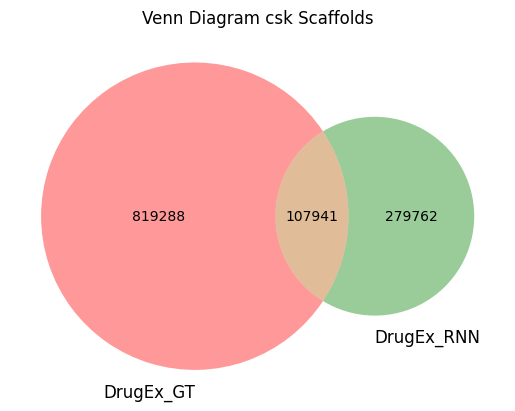

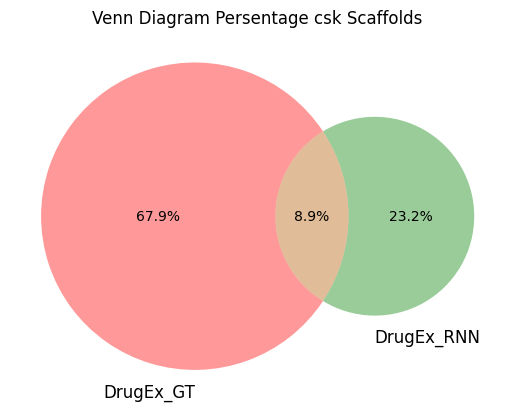

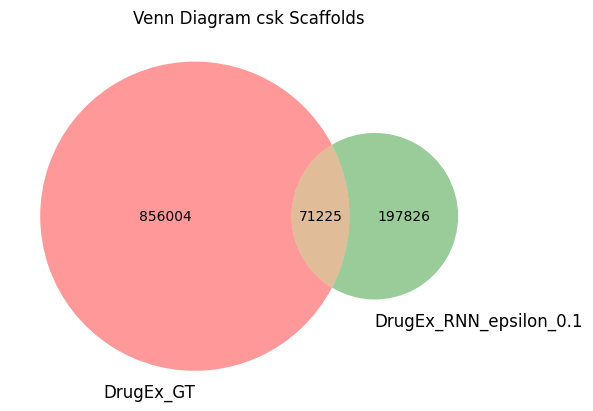

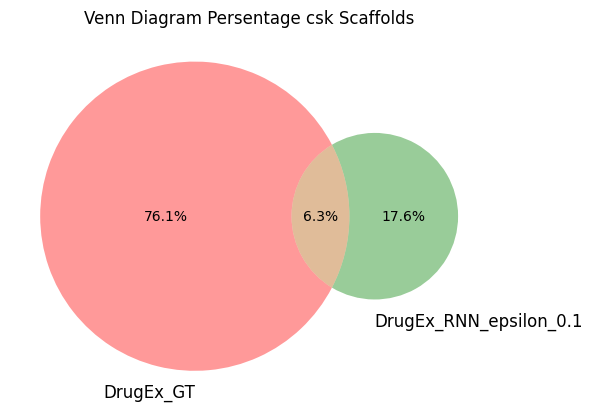

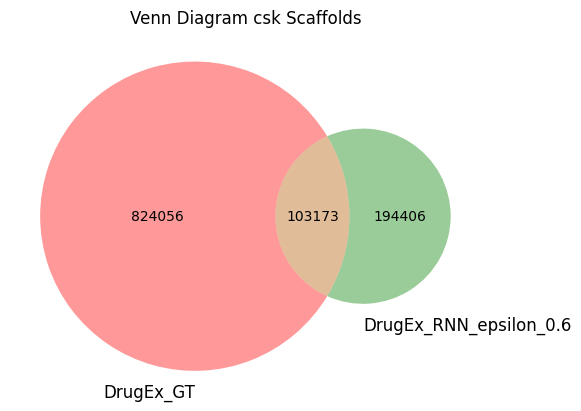

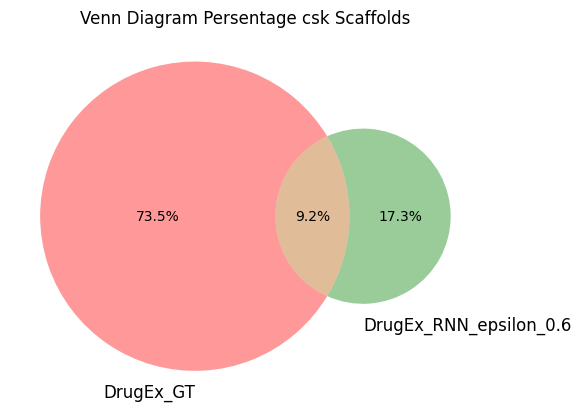

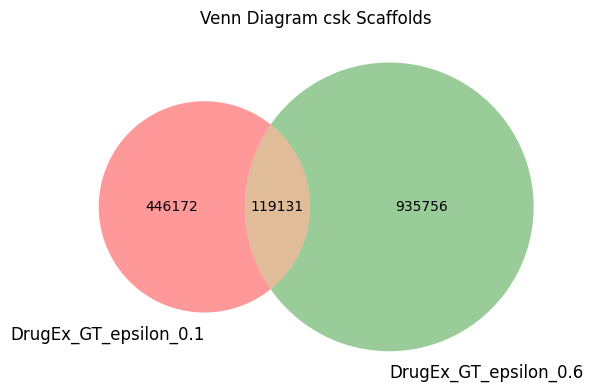

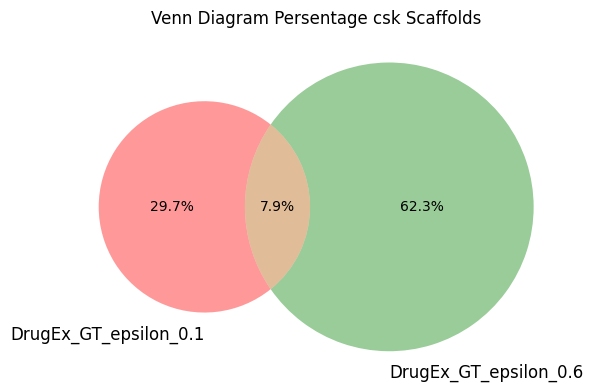

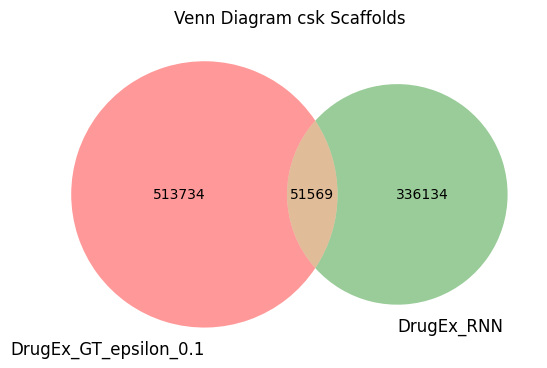

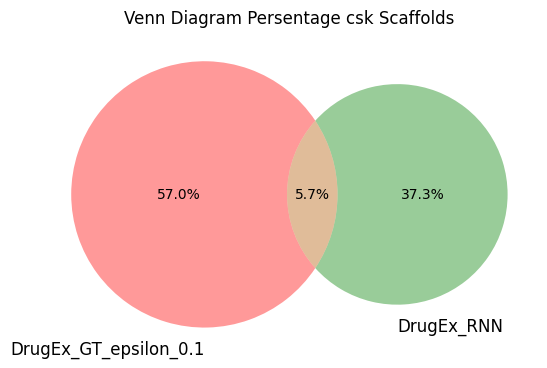

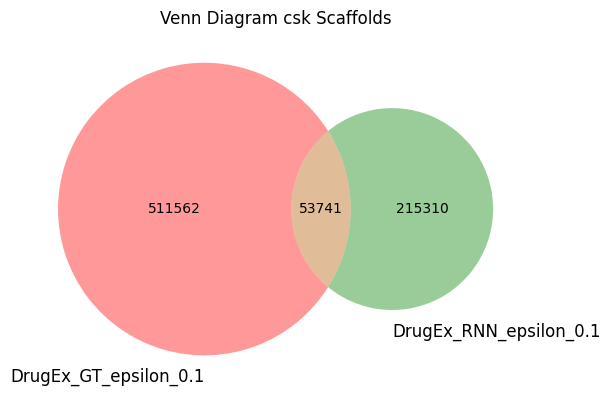

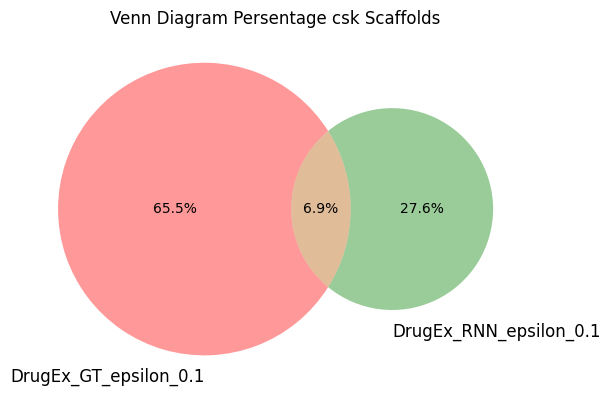

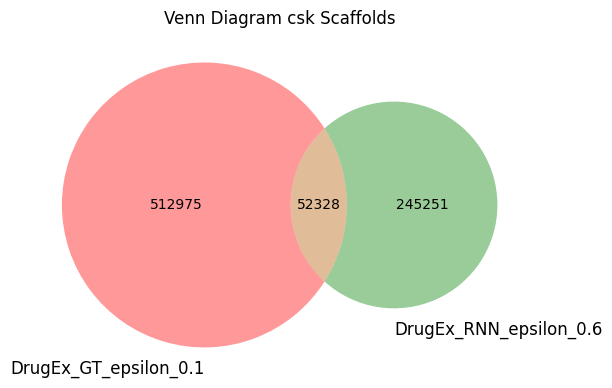

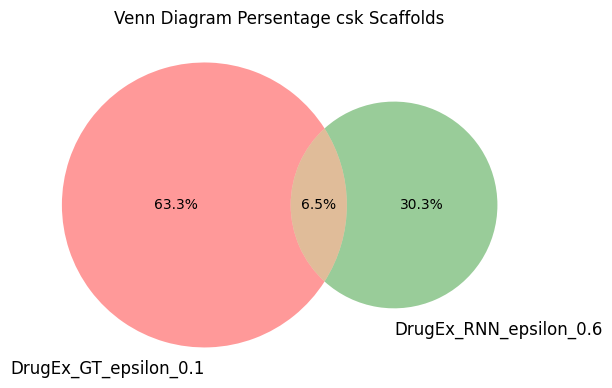

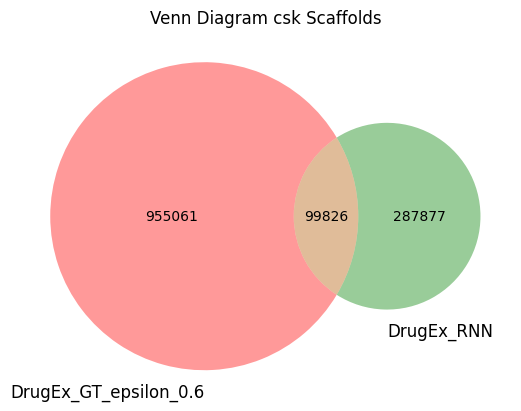

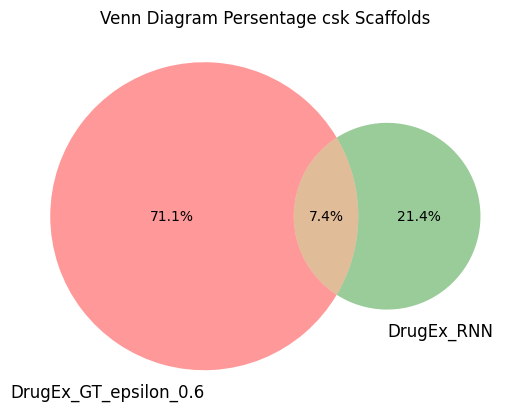

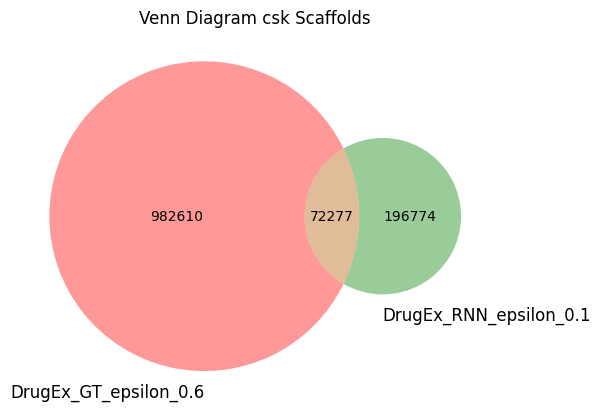

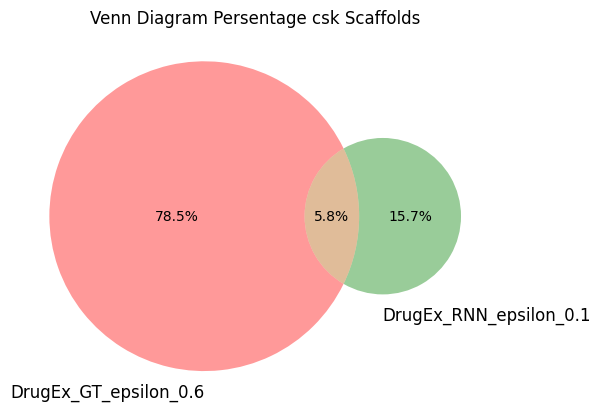

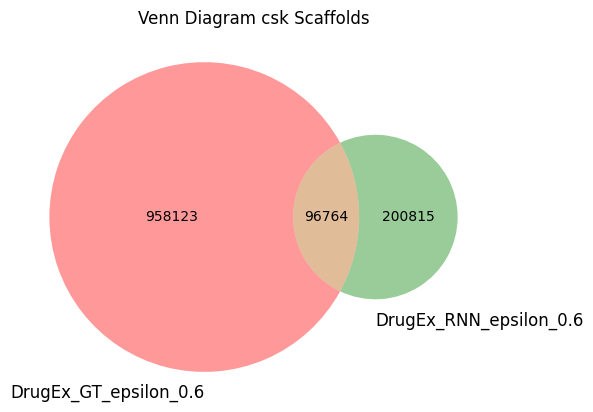

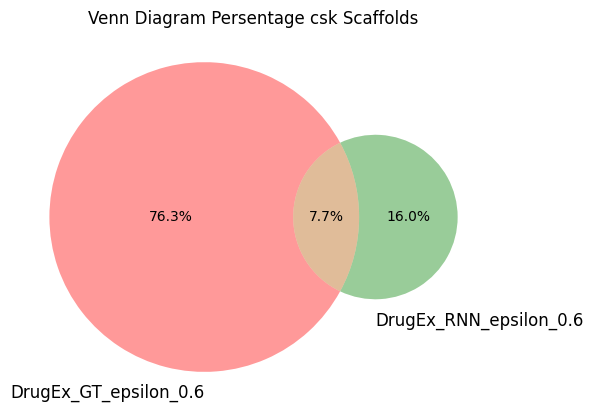

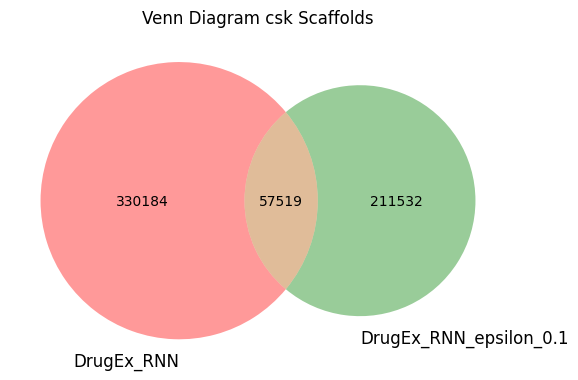

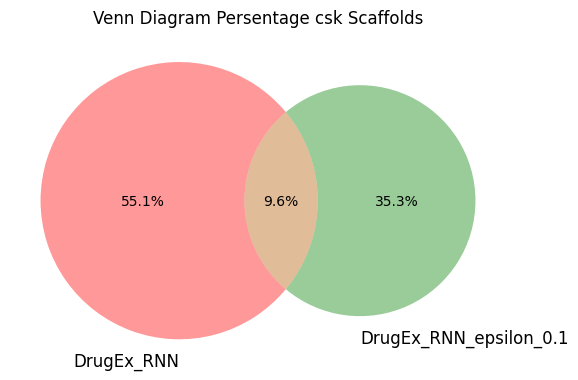

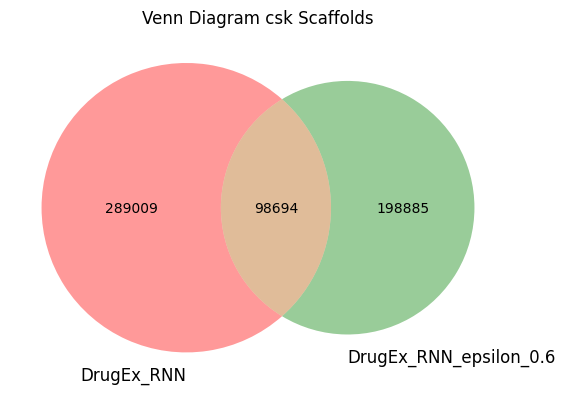

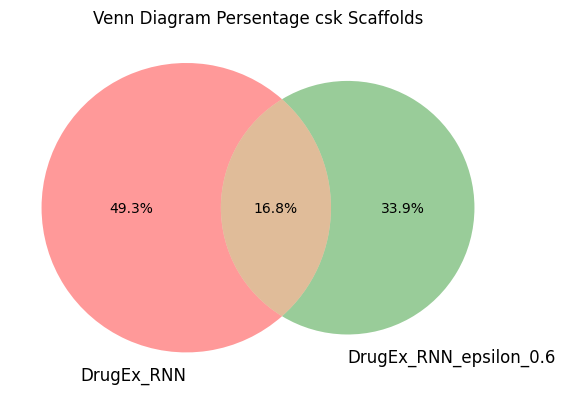

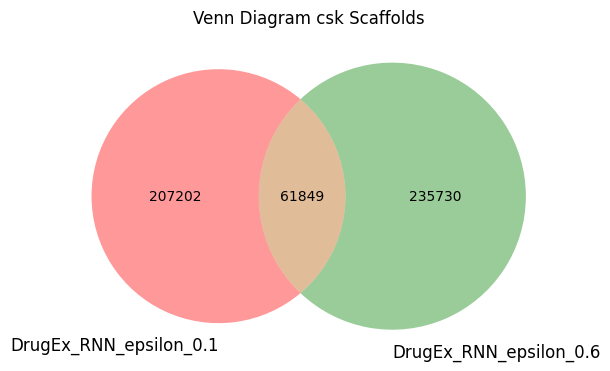

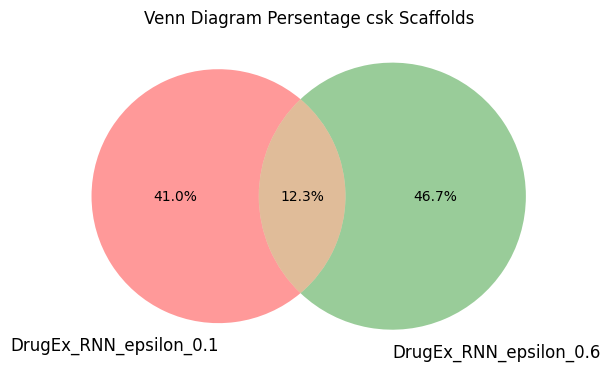

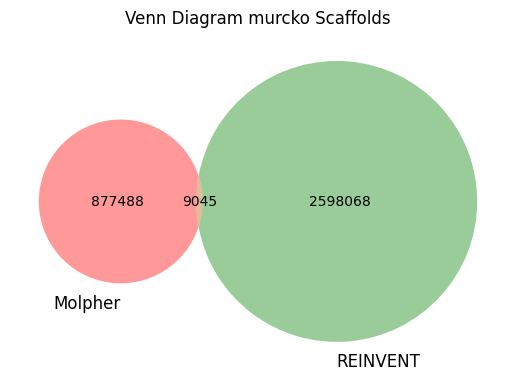

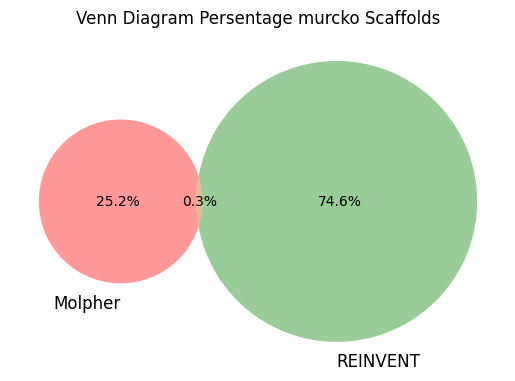

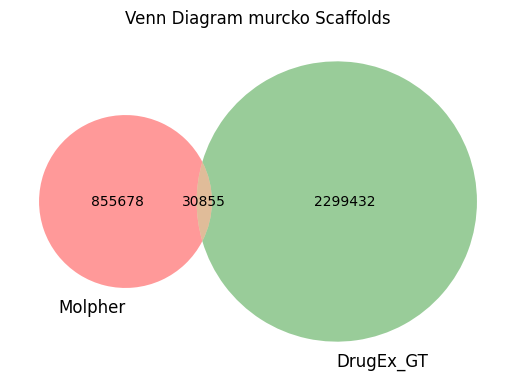

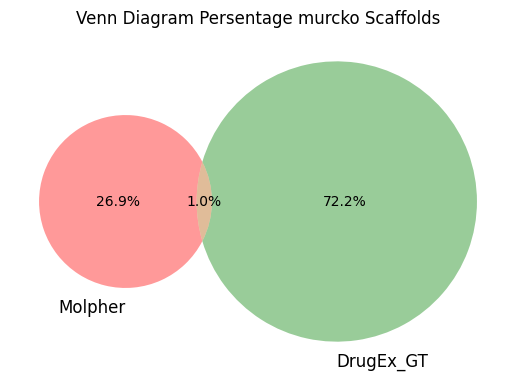

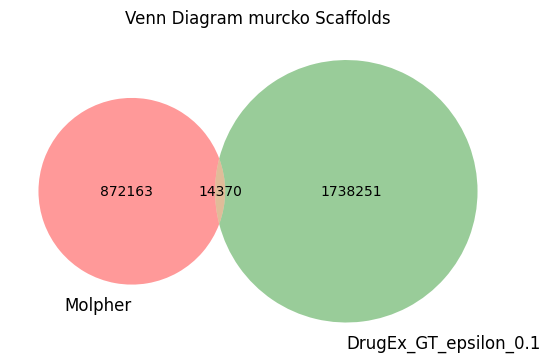

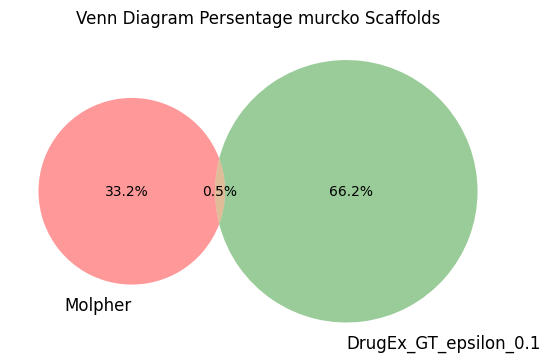

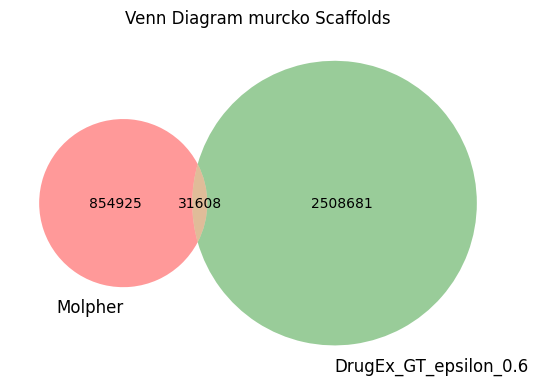

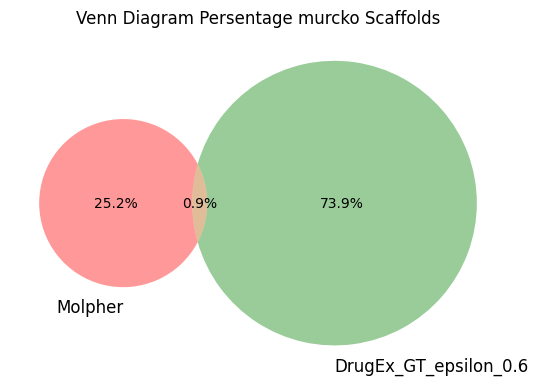

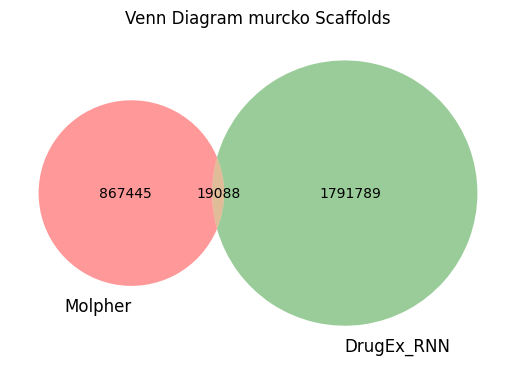

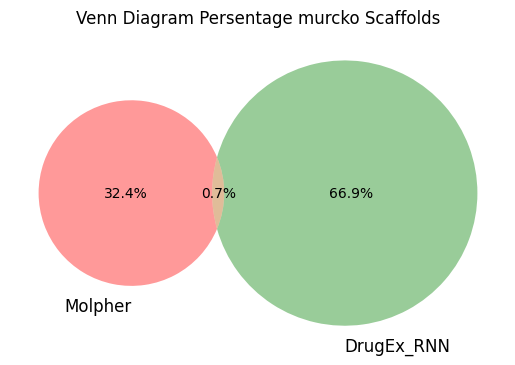

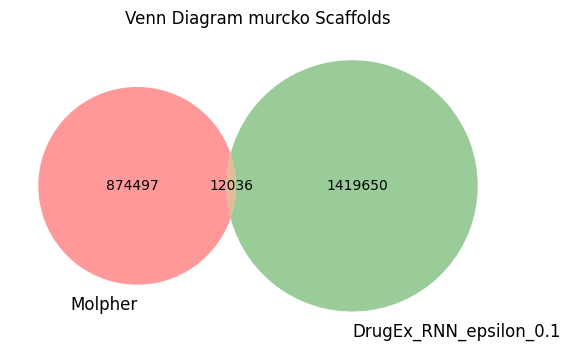

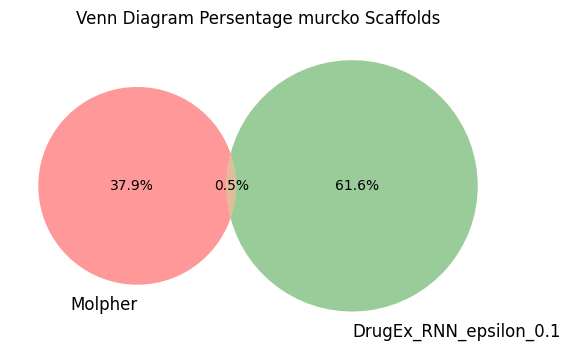

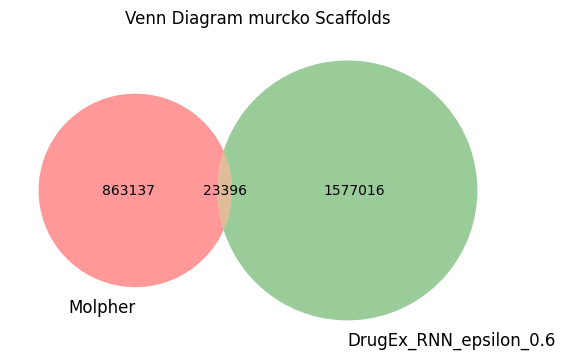

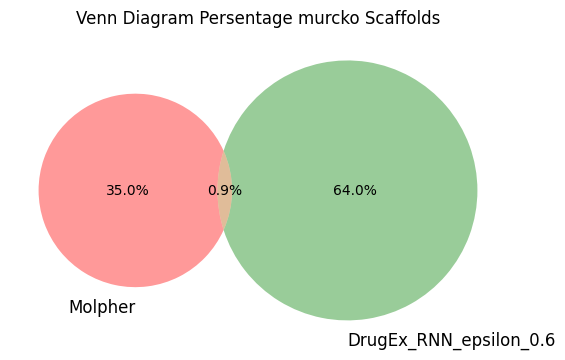

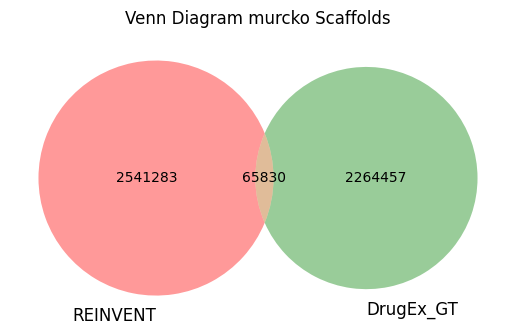

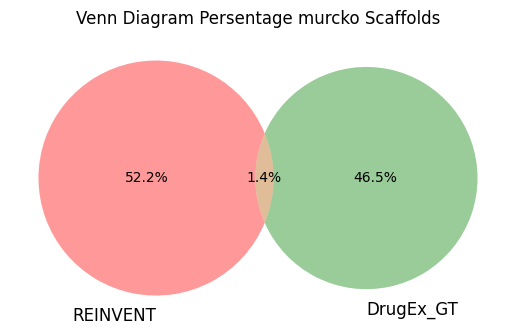

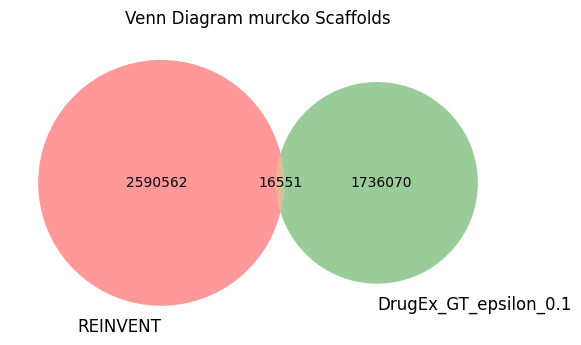

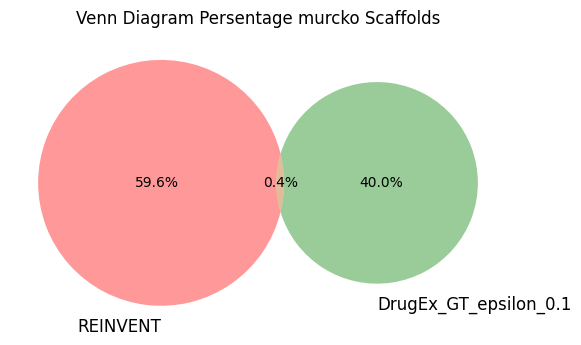

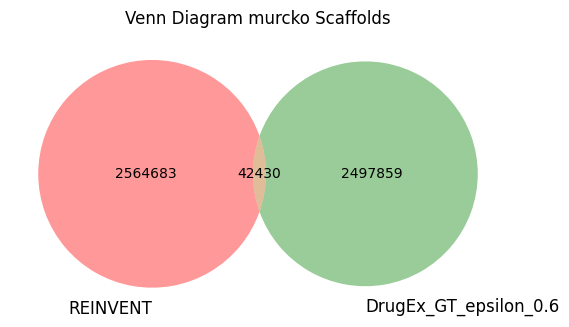

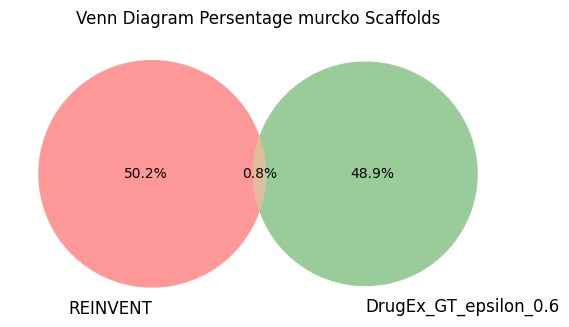

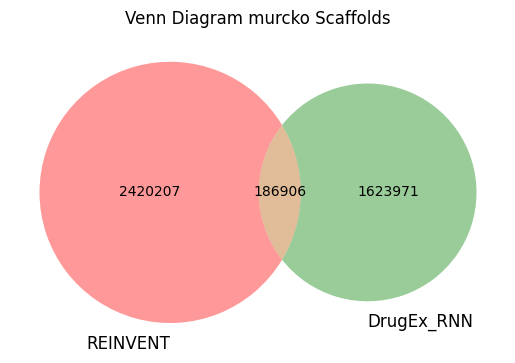

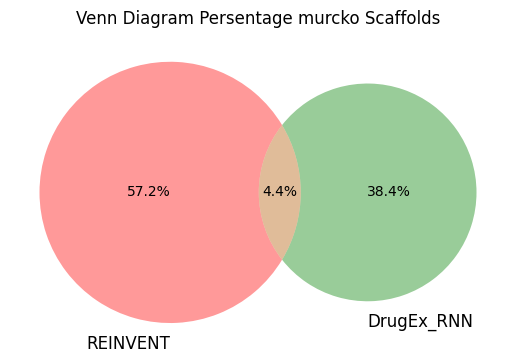

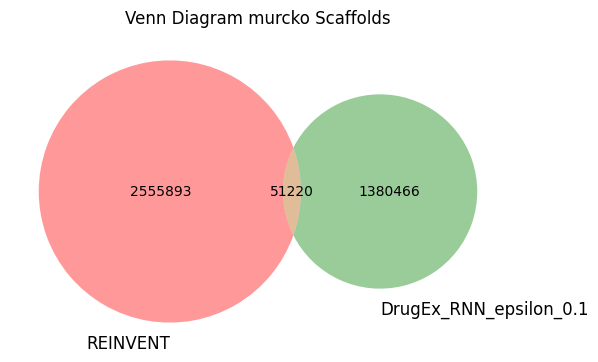

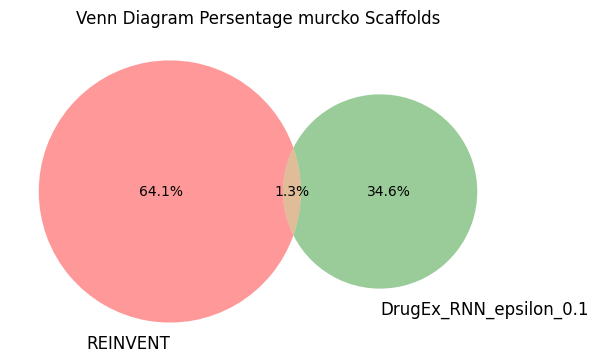

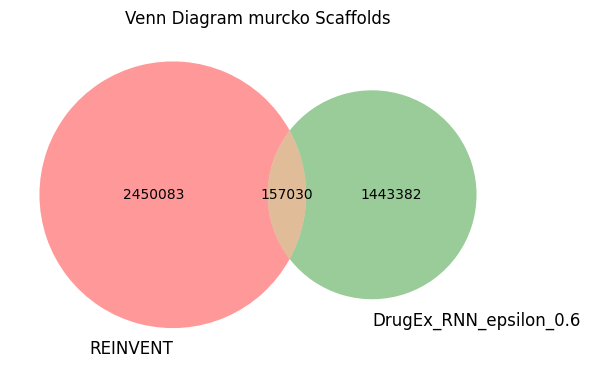

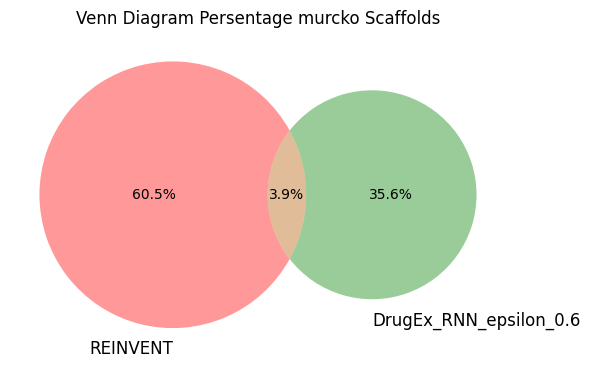

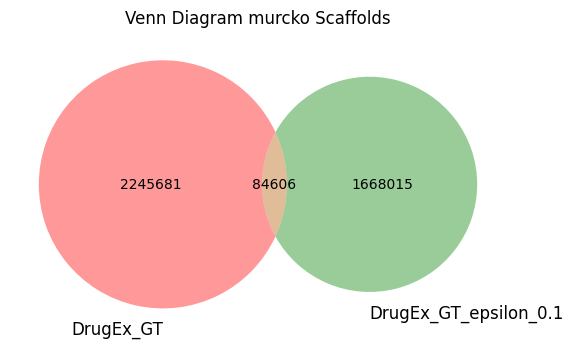

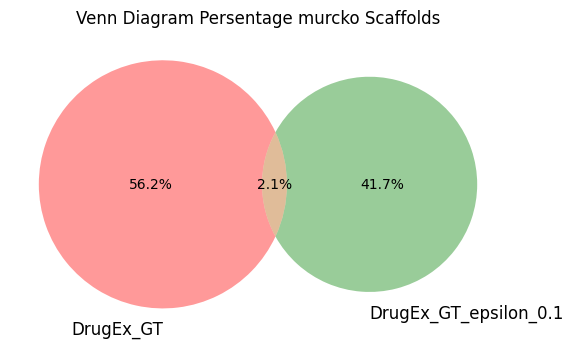

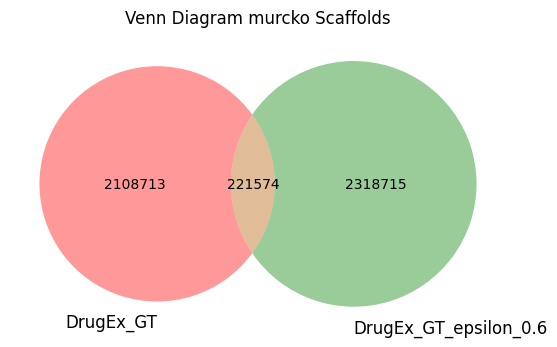

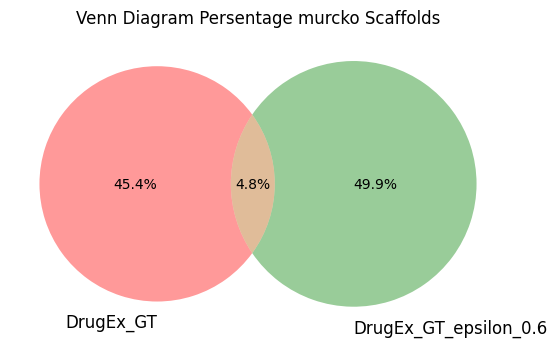

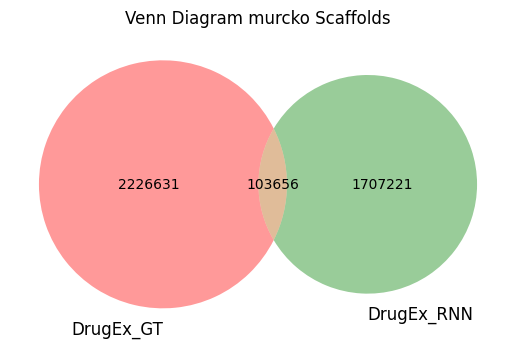

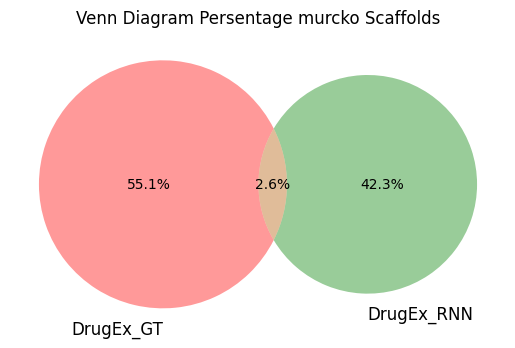

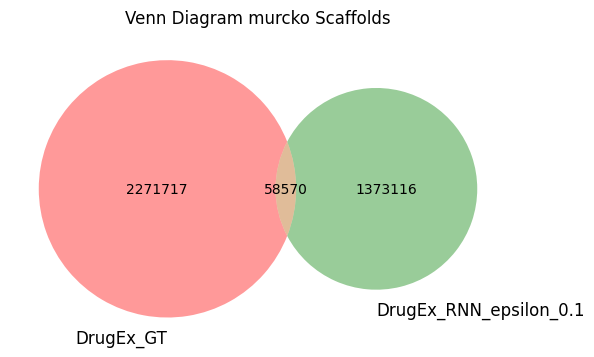

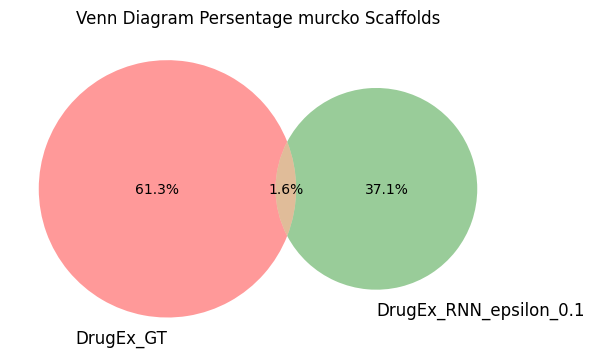

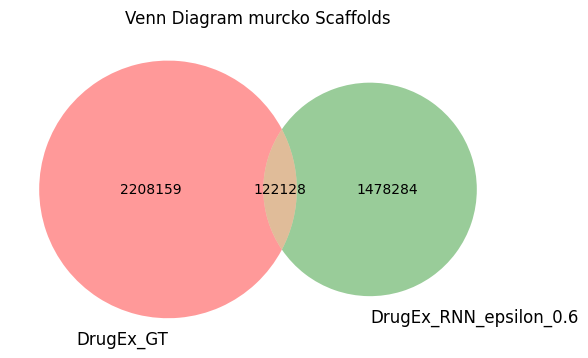

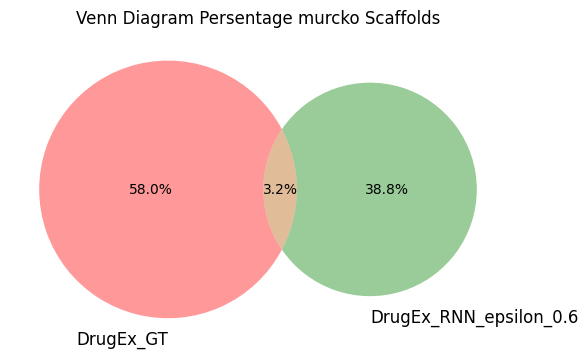

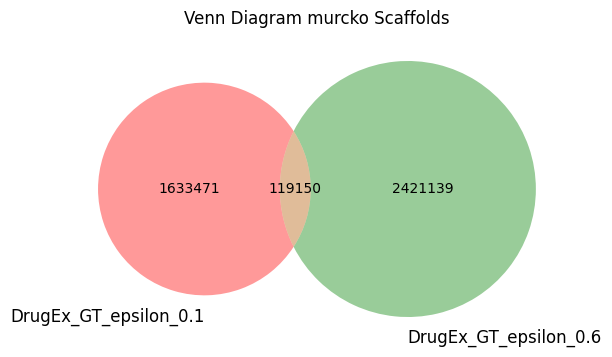

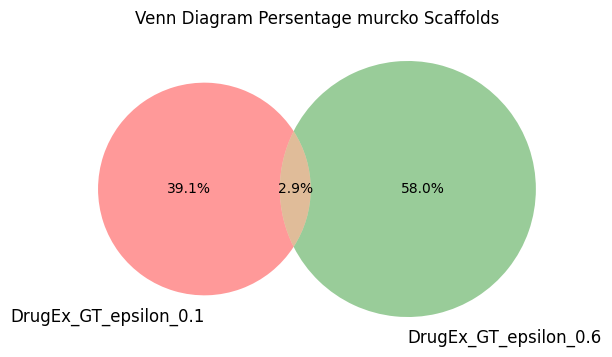

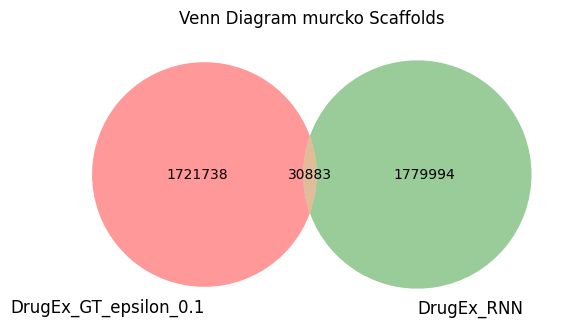

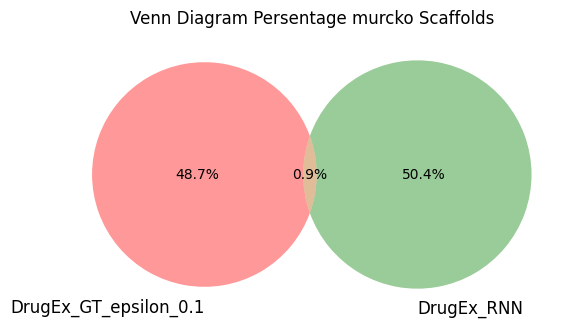

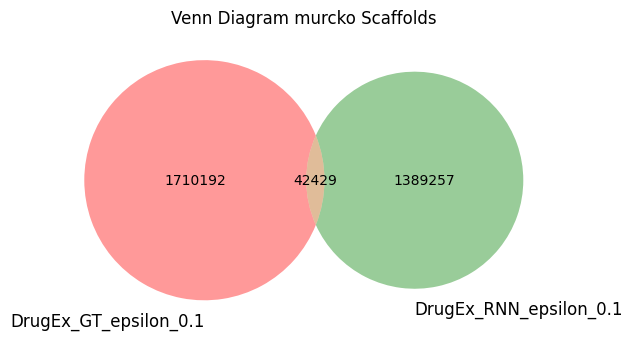

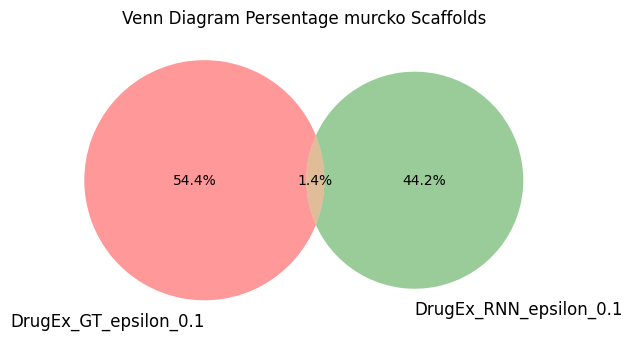

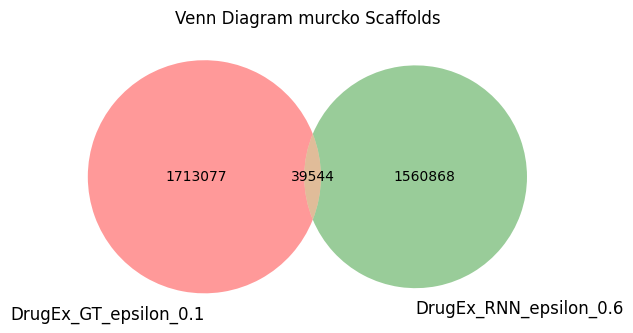

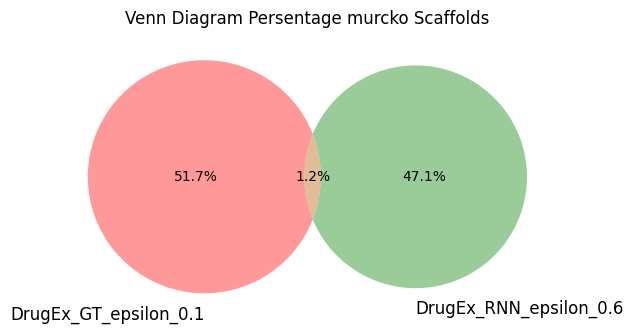

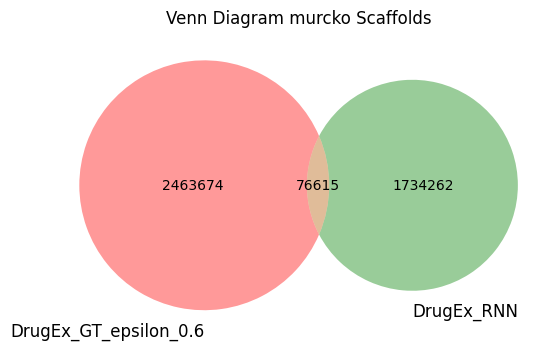

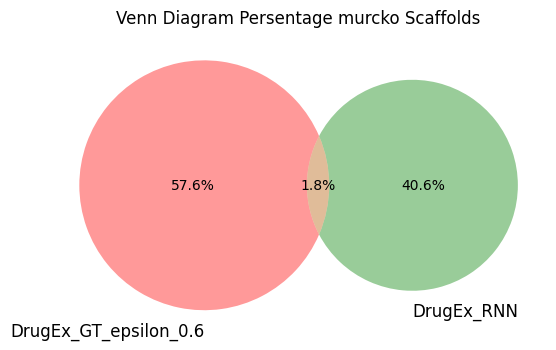

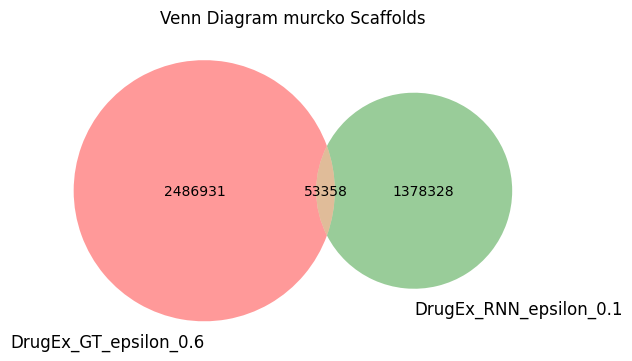

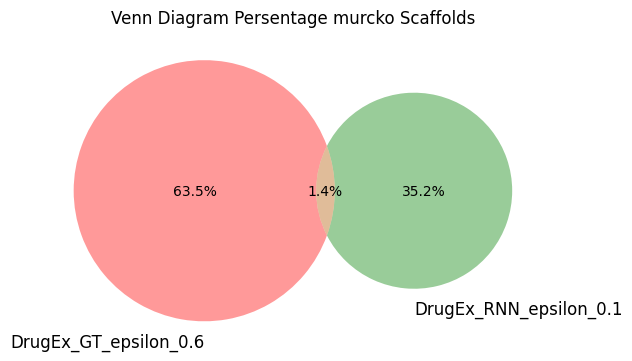

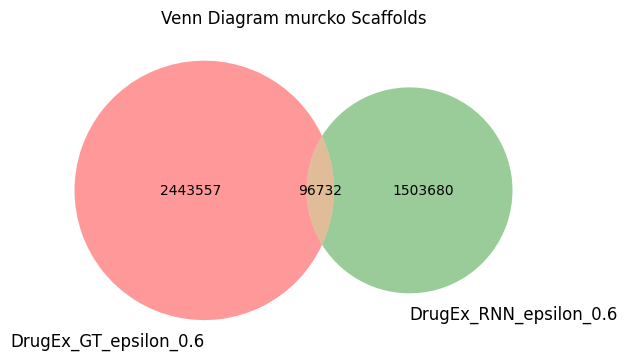

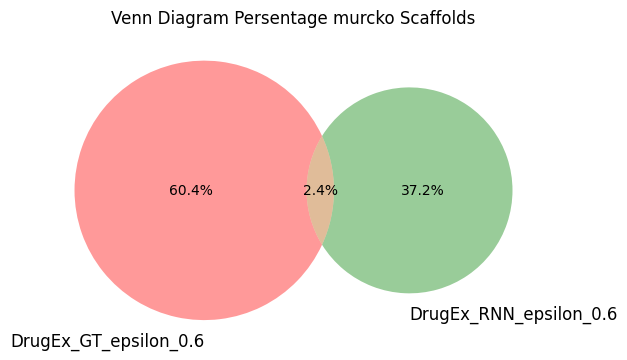

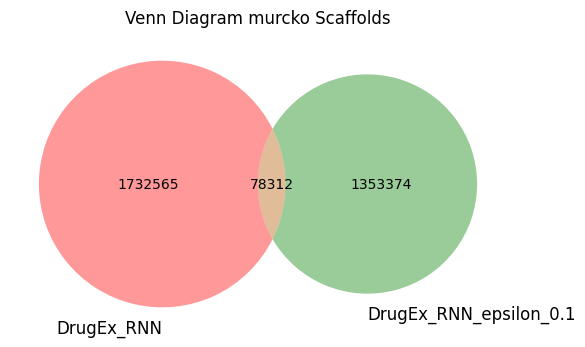

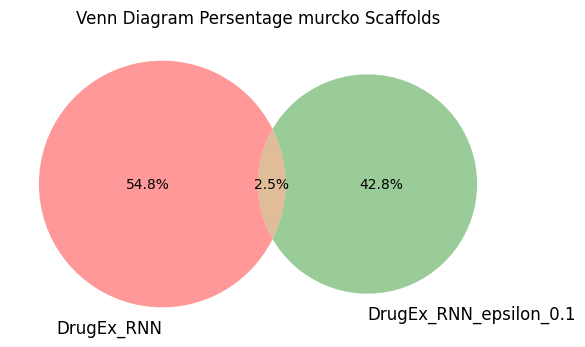

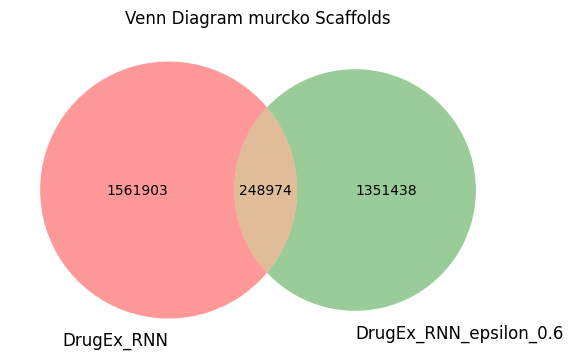

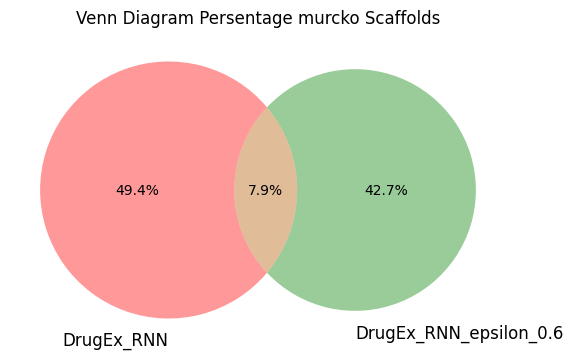

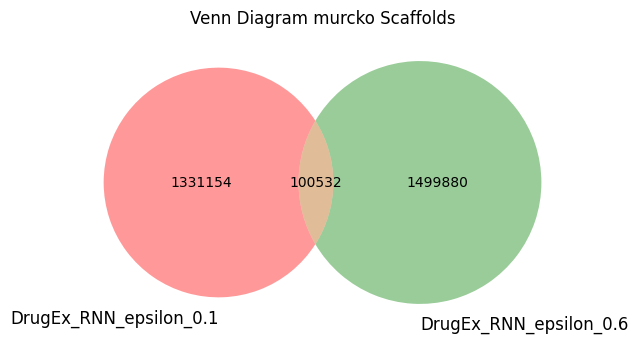

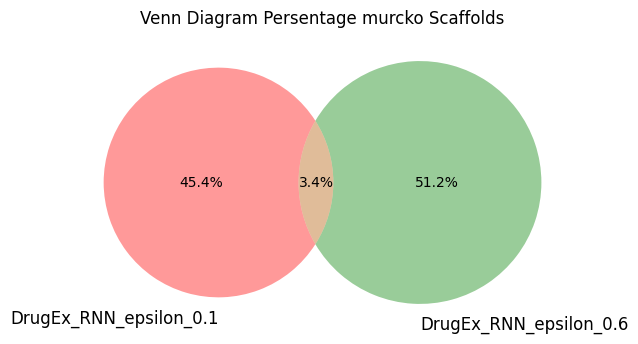

In [6]:

list_of_generators = ['Molpher', 'REINVENT', 'DrugEx_GT', 'DrugEx_GT_epsilon_0.1', 'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN', 
                      'DrugEx_RNN_epsilon_0.1', 'DrugEx_RNN_epsilon_0.6']


for type_scaf in ['csk', 'murcko']:
    for generator_1, generator_2 in list(combinations(list_of_generators, 2)):
        df_generator_1 = pd.DataFrame()
        df_generator_2 = pd.DataFrame()
        for num in [0,1,2,3,4]:
    
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/dis/{generator_1}/scaffolds_of_output_set_cluster_{num}_dis_{generator_1}.csv", header = None)
            df_generator_1 = pd.concat([df_generator_1, df])
        
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/dis/{generator_2}/scaffolds_of_output_set_cluster_{num}_dis_{generator_2}.csv", header = None)
            df_generator_2 = pd.concat([df_generator_2, df])
        df_generator_1 = df_generator_1.reset_index(drop=True)
        df_generator_2 = df_generator_2.reset_index(drop=True)
        
    
        scaffolds_A = set(df_generator_1[0].tolist())
        scaffolds_B = set(df_generator_2[0].tolist())
        
        # Výpočet vztahů mezi množinami
        intersection = scaffolds_A & scaffolds_B  # Společné scaffoldy
        only_in_A = scaffolds_A - scaffolds_B     # Unikátní v A
        only_in_B = scaffolds_B - scaffolds_A     # Unikátní v B
        
        # Vytvoření Vennova diagramu
        venn = venn2([scaffolds_A, scaffolds_B], (generator_1, generator_2))
        if len(intersection) <= 5000:
            venn.get_label_by_id('11').set_text(f"{len(intersection)}")
            venn.get_label_by_id('11').set_fontsize(10)  # Zvýraznění malého čísla
        plt.title(f"Venn Diagram {type_scaf} Scaffolds")
        plt.savefig(f'img/overlaps/{type_scaf}/overlaps_{generator_1}_{generator_2}.png')
        plt.show()
        
        
        # Spočítání celkového počtu jedinečných prvků
        total_unique = len(scaffolds_A | scaffolds_B)
    
        # Výpočet procent pro každou část
        percent_in_A = len(only_in_A) / total_unique * 100
        percent_in_B = len(only_in_B) / total_unique * 100
        percent_intersection = len(intersection) / total_unique * 100
    
        # Vytvoření Vennova diagramu
        venn = venn2([scaffolds_A, scaffolds_B], (generator_1, generator_2))
    
        # Nastavení štítků na procentuální hodnoty
        venn.get_label_by_id('10').set_text(f"{percent_in_A:.1f}%")
        venn.get_label_by_id('01').set_text(f"{percent_in_B:.1f}%")
        venn.get_label_by_id('11').set_text(f"{percent_intersection:.1f}%")
        
        plt.title(f"Venn Diagram Persentage {type_scaf} Scaffolds")
        #plt.savefig(f'img/overlaps/{type_scaf}/overlaps_{generator_1}_{generator_2}_persentage.png')
        plt.show()

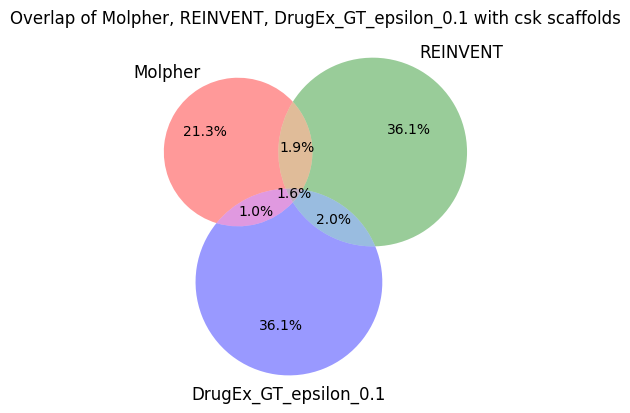

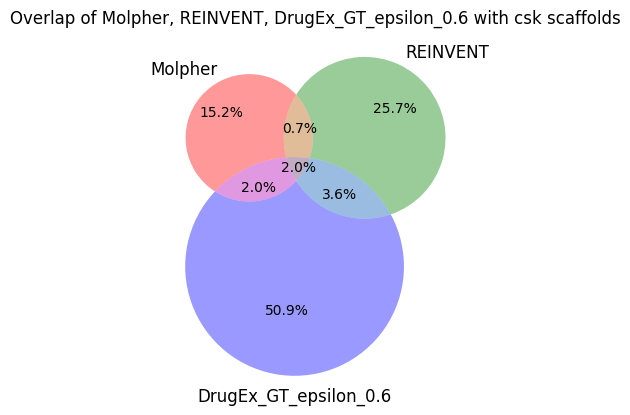

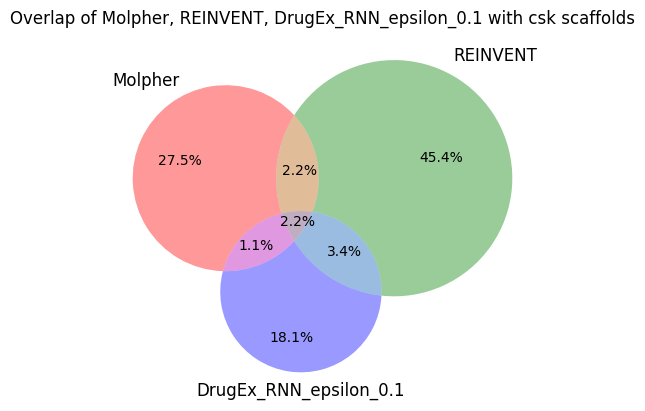

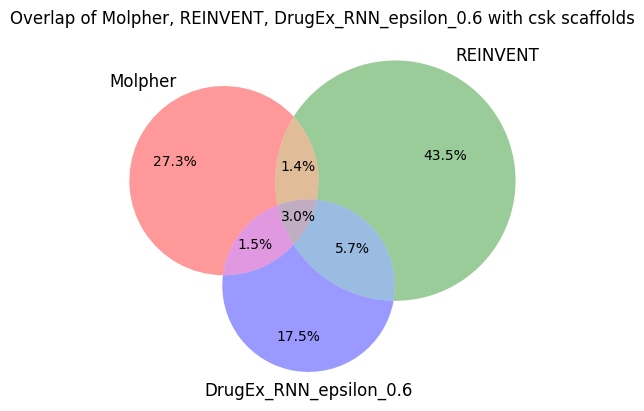

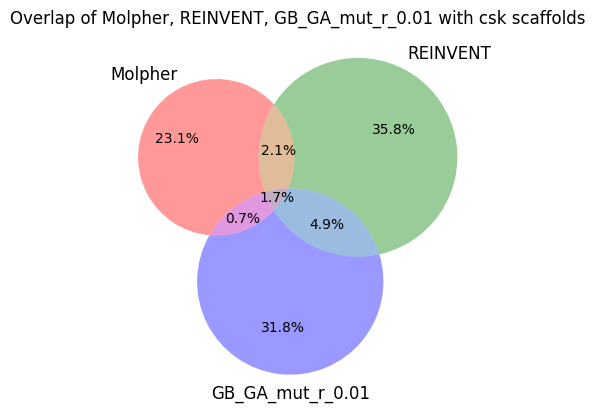

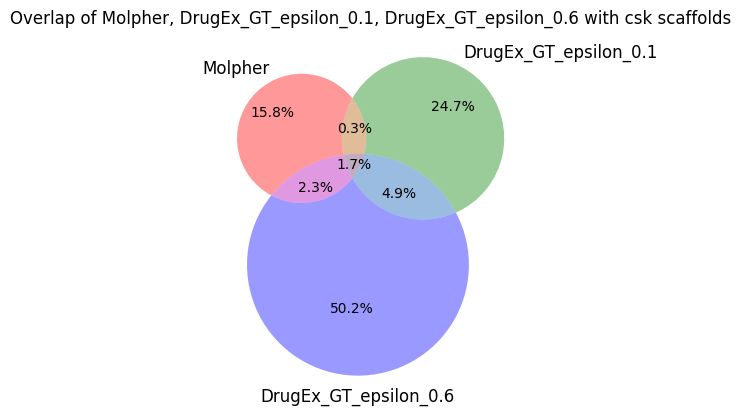

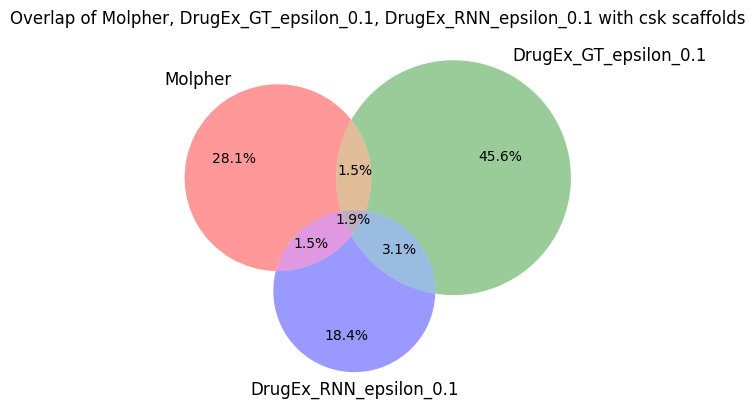

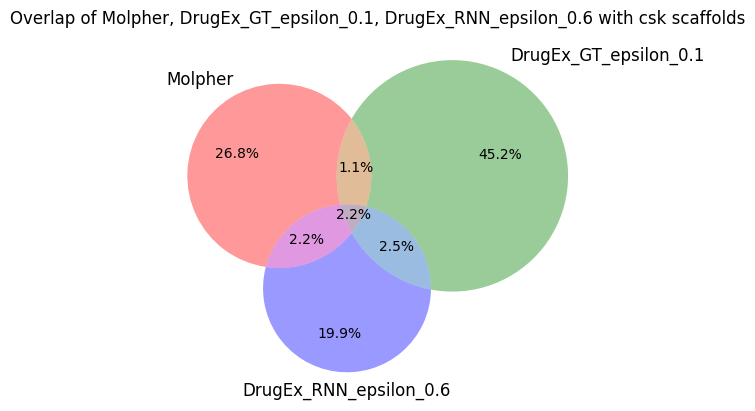

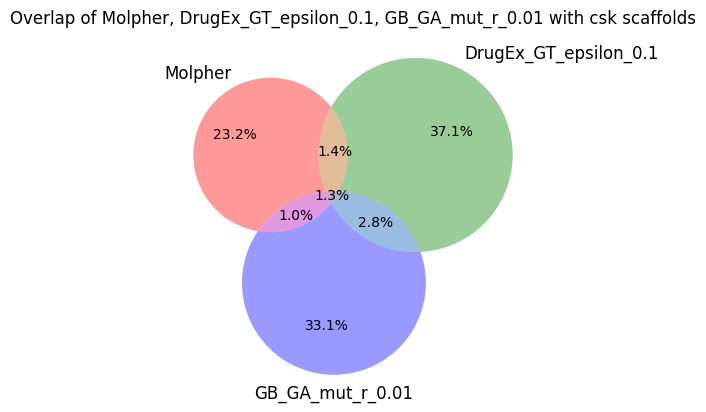

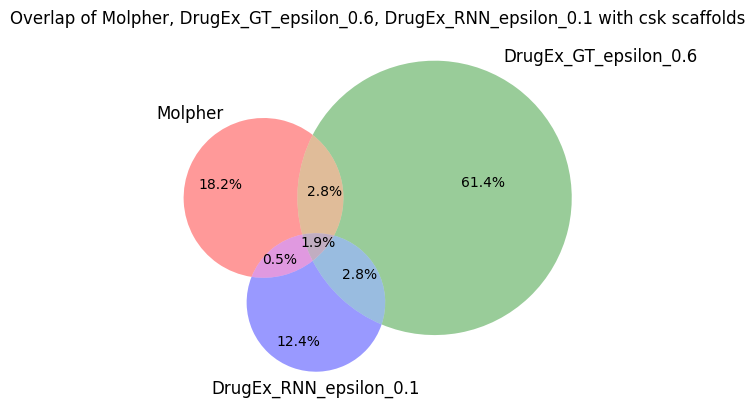

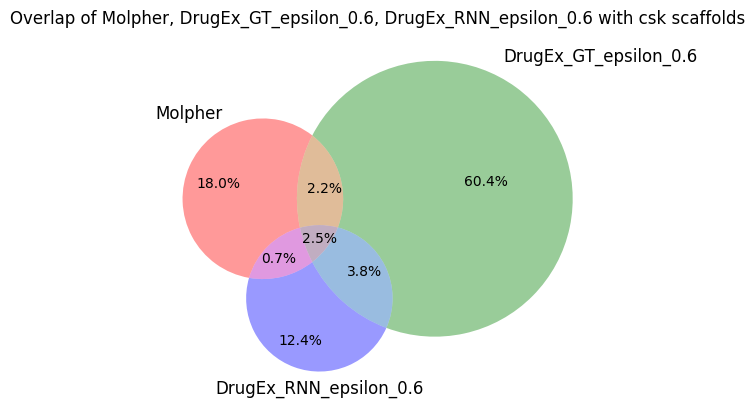

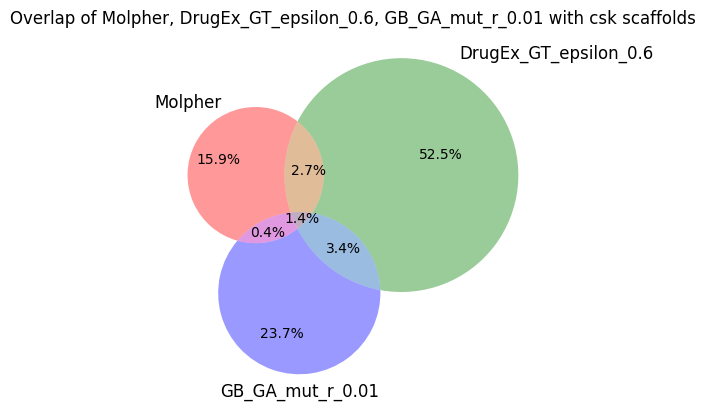

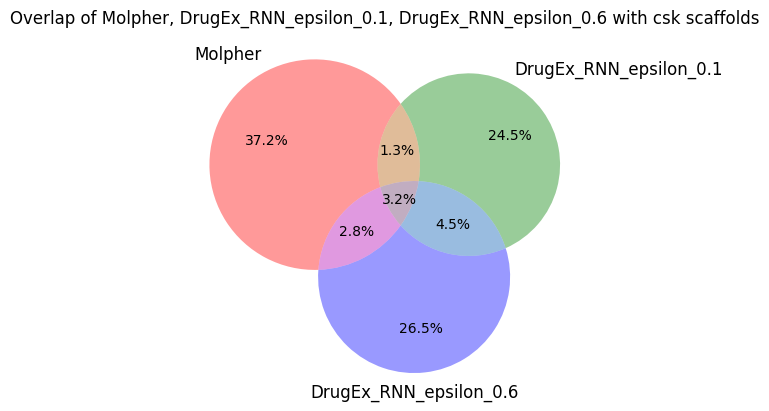

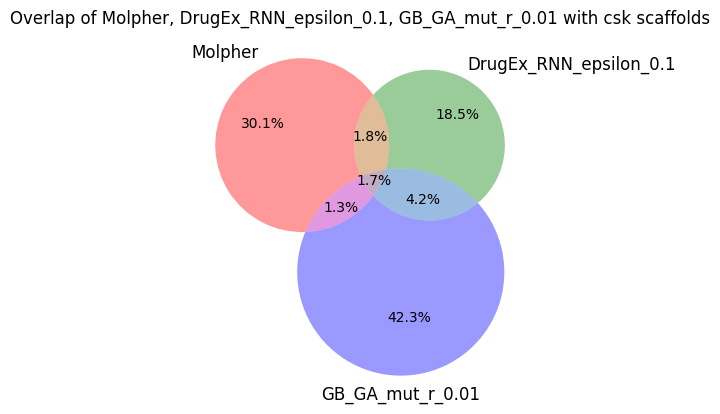

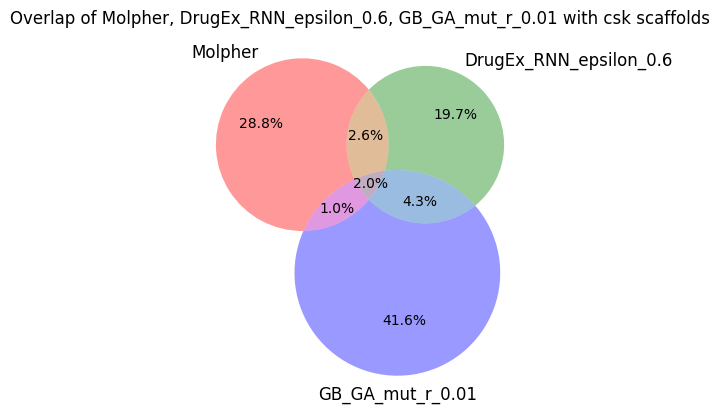

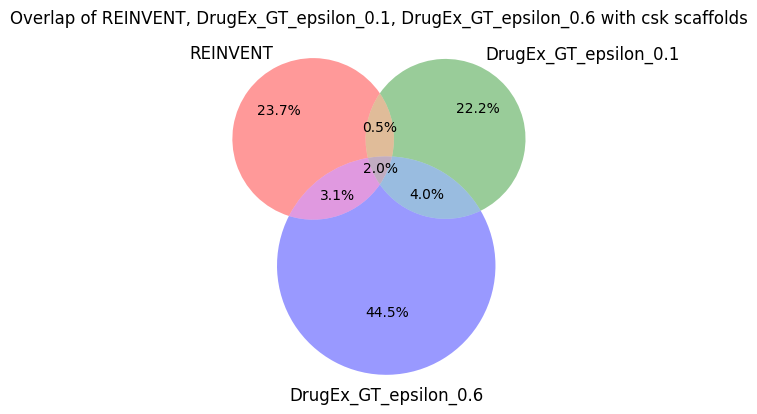

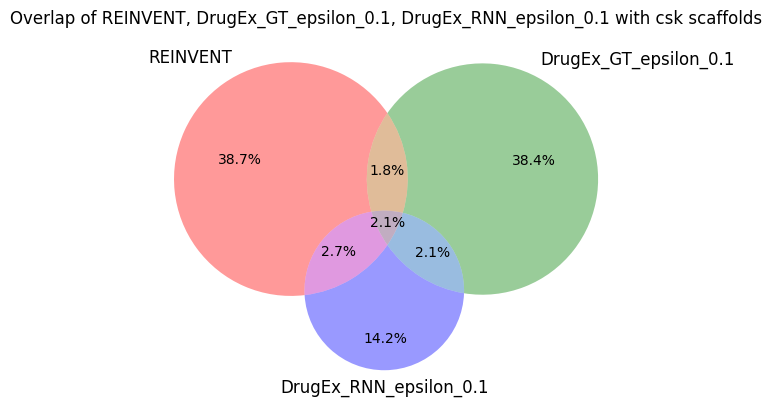

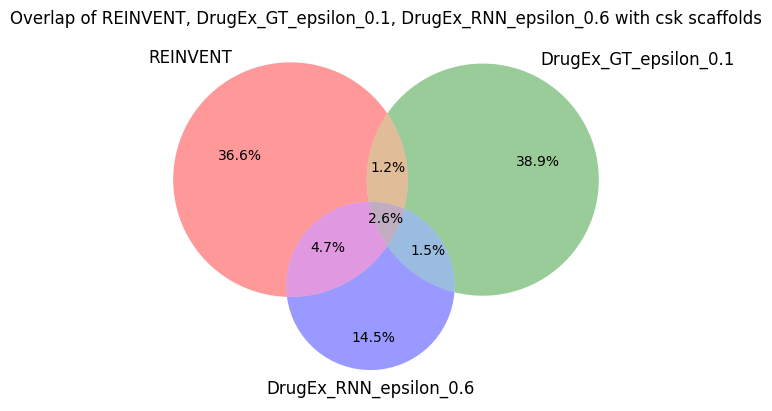

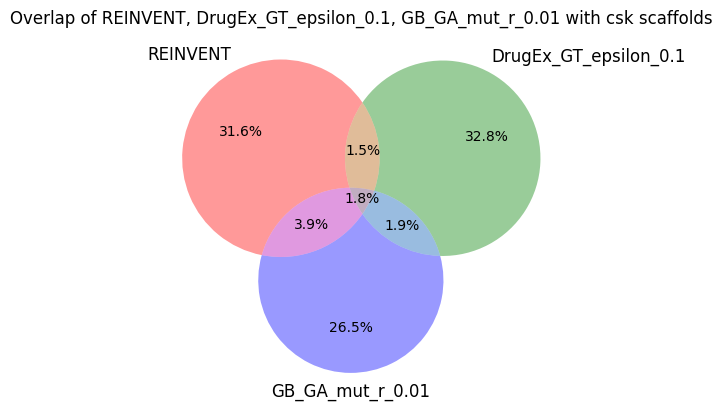

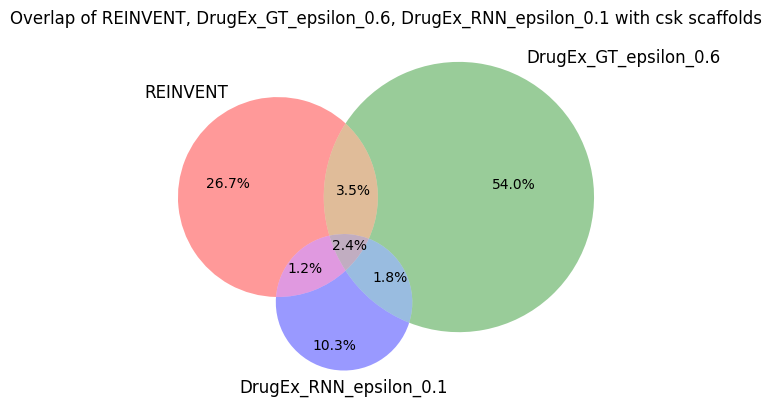

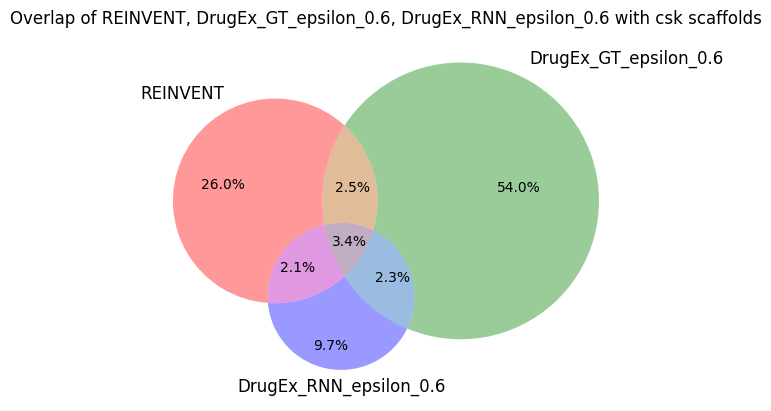

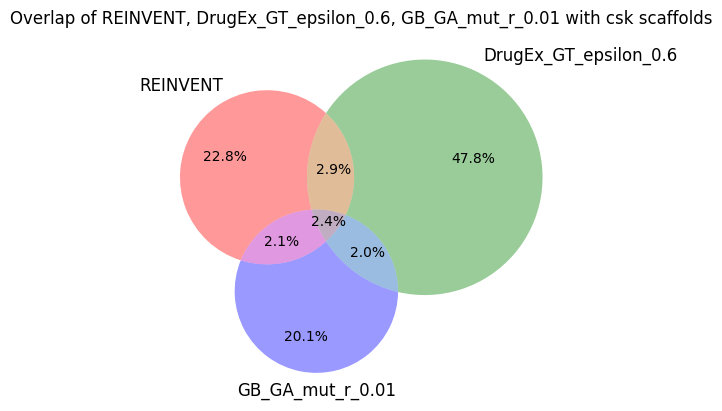

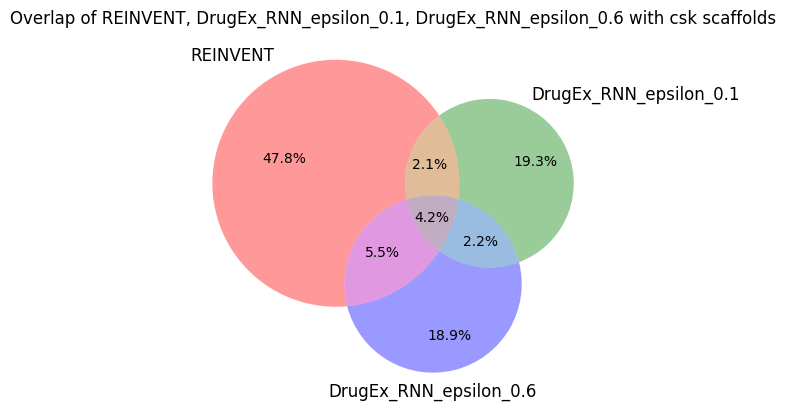

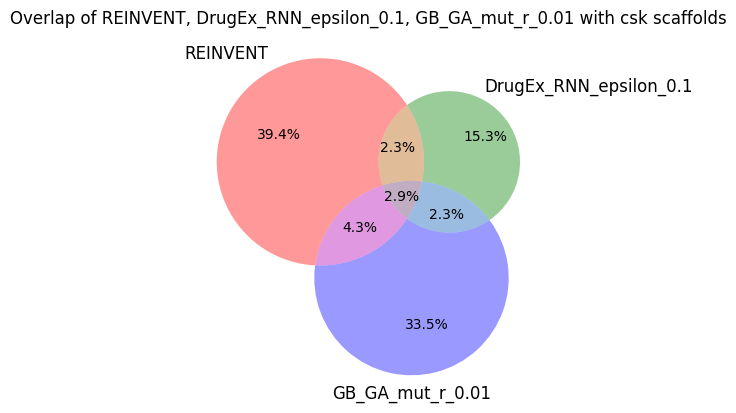

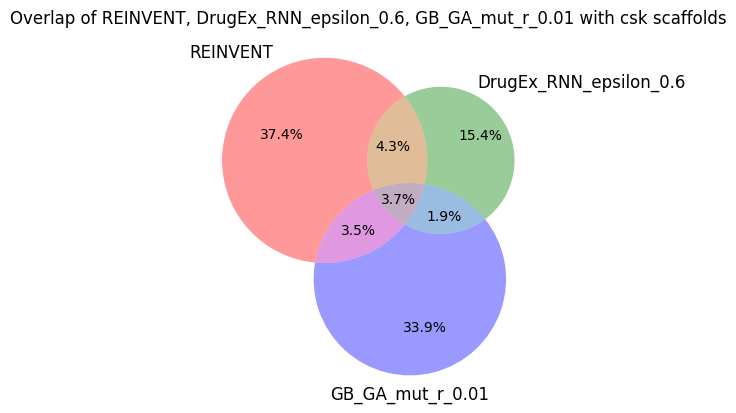

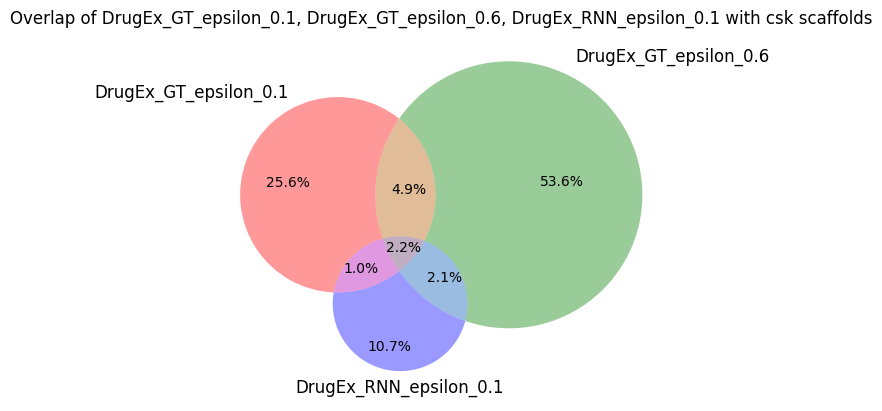

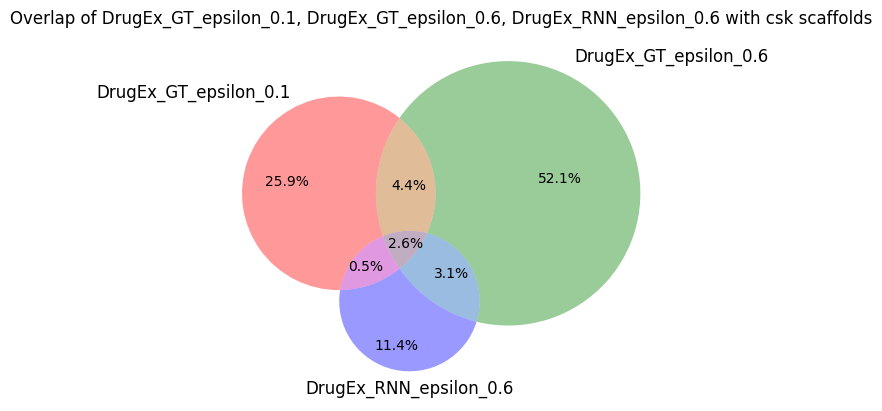

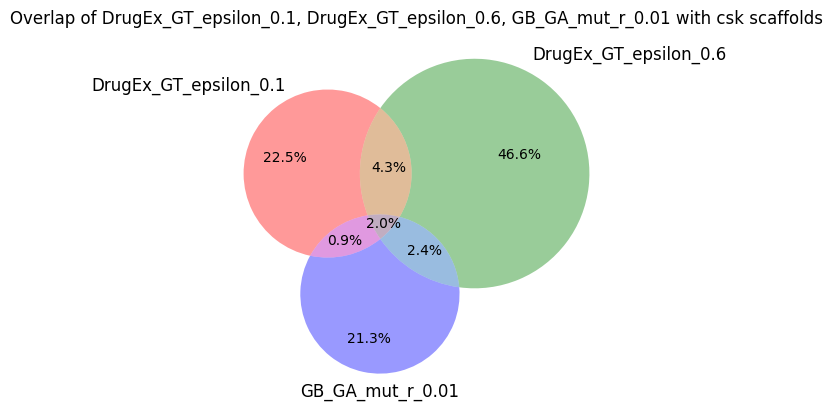

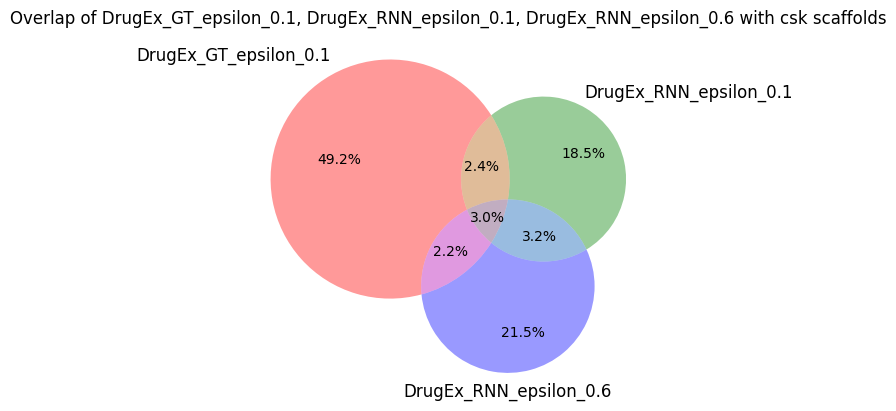

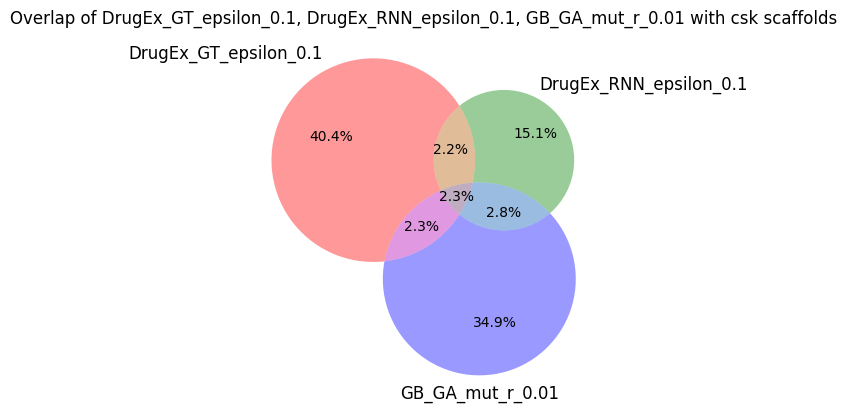

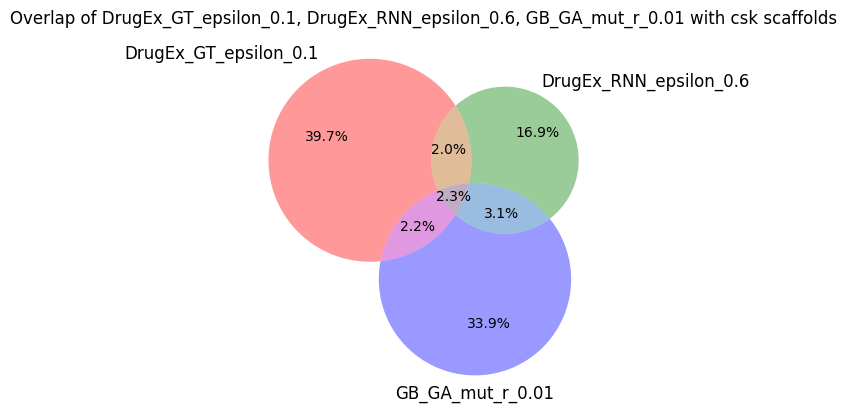

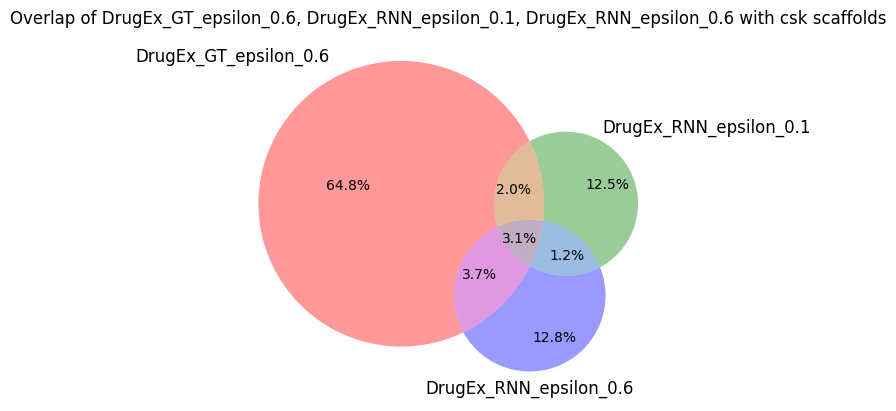

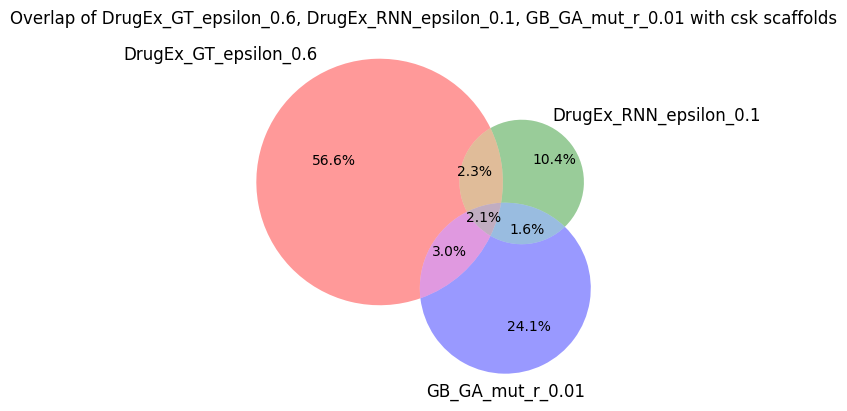

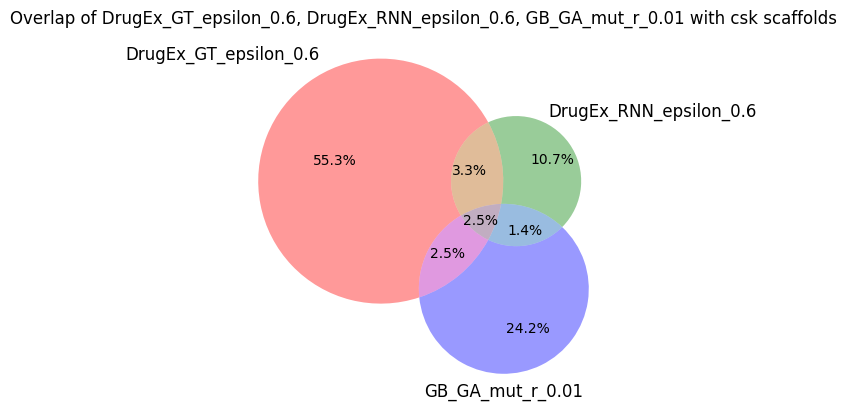

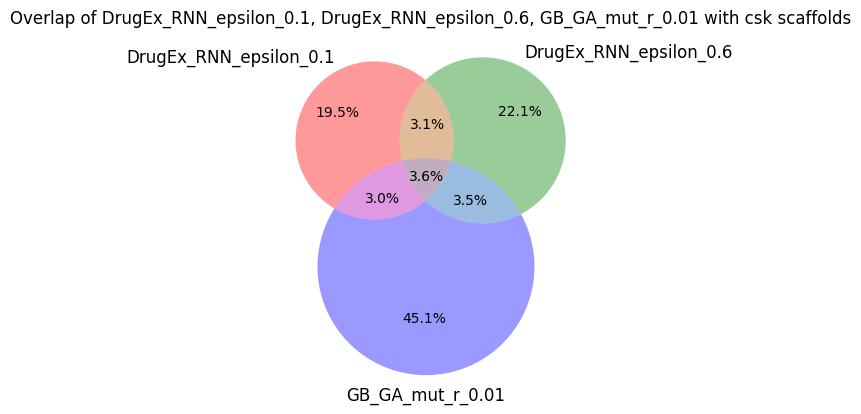

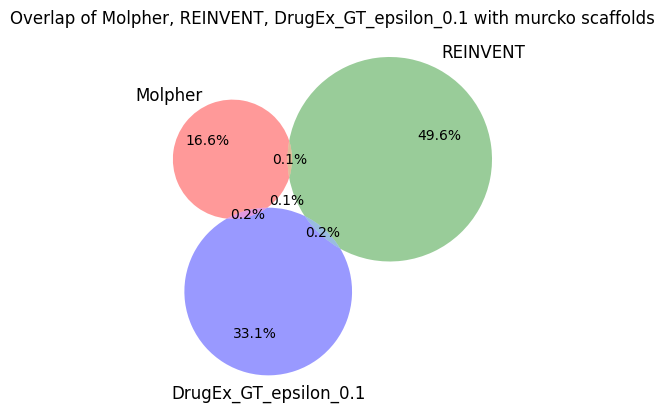

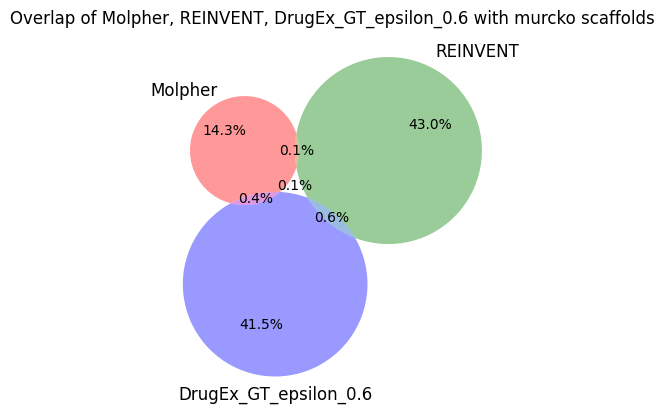

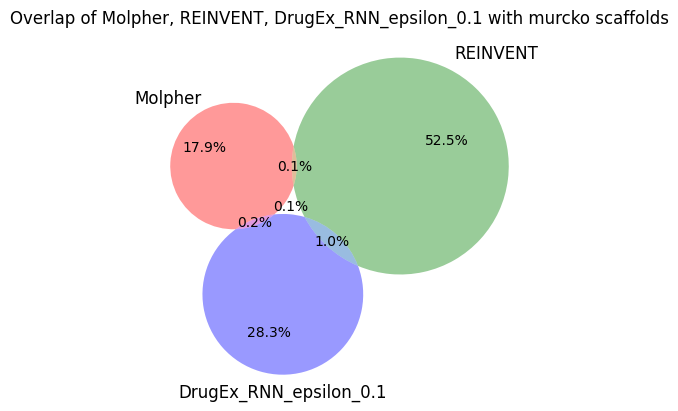

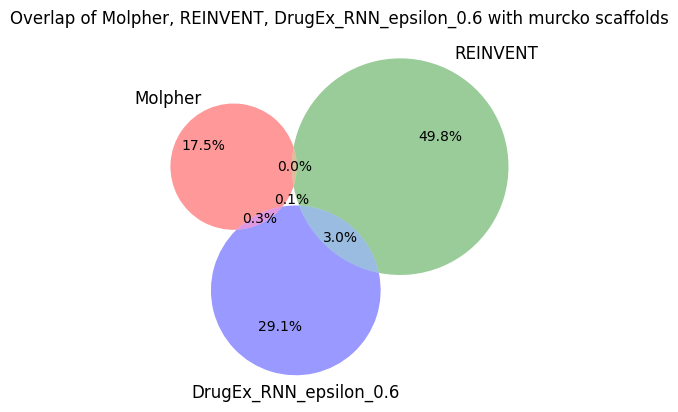

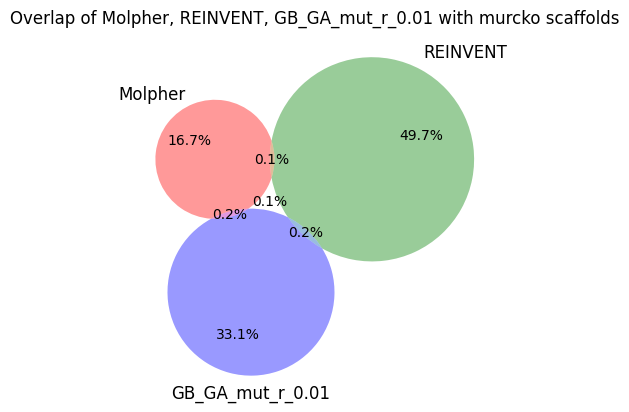

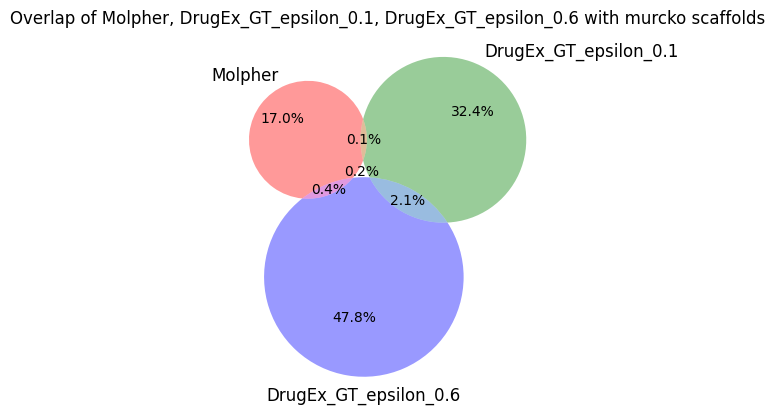

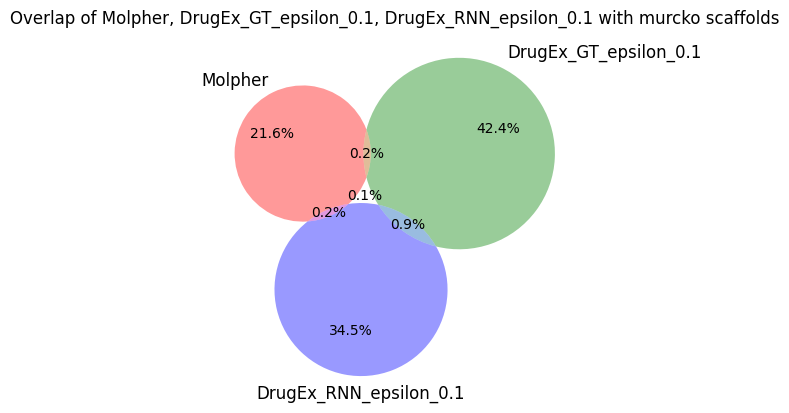

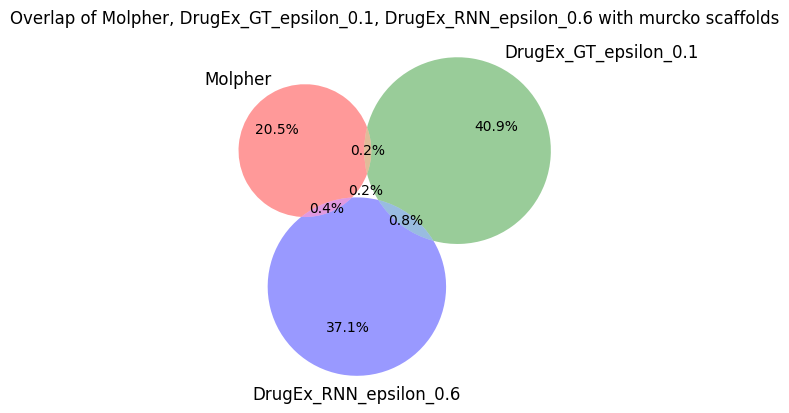

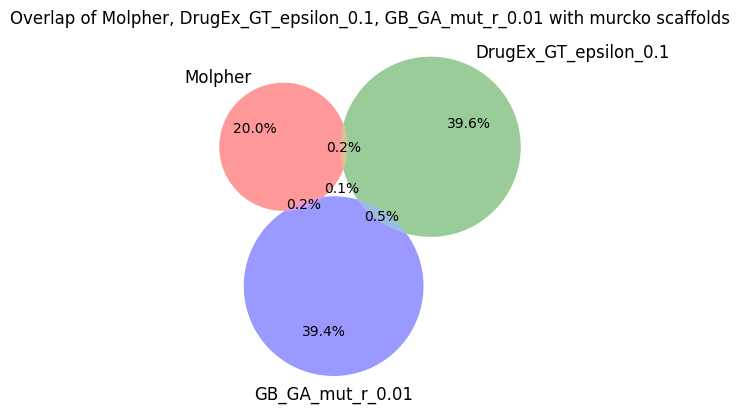

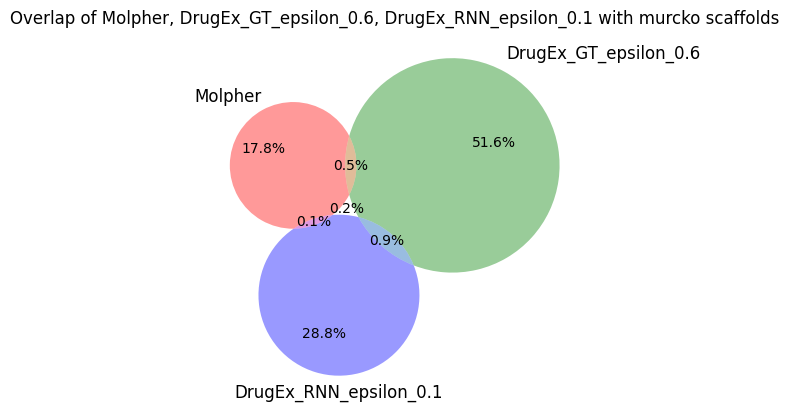

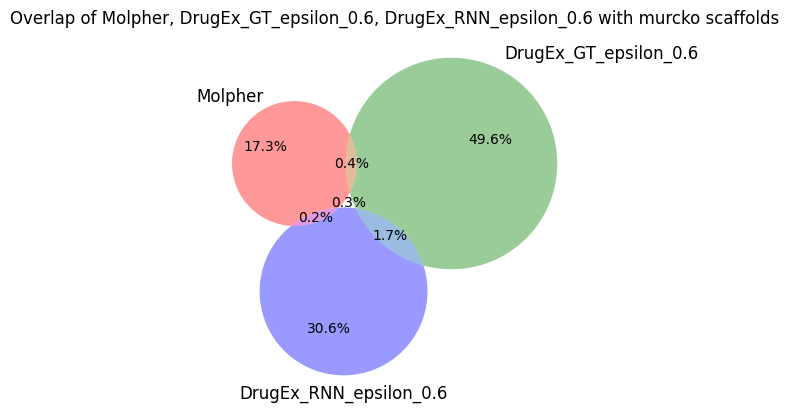

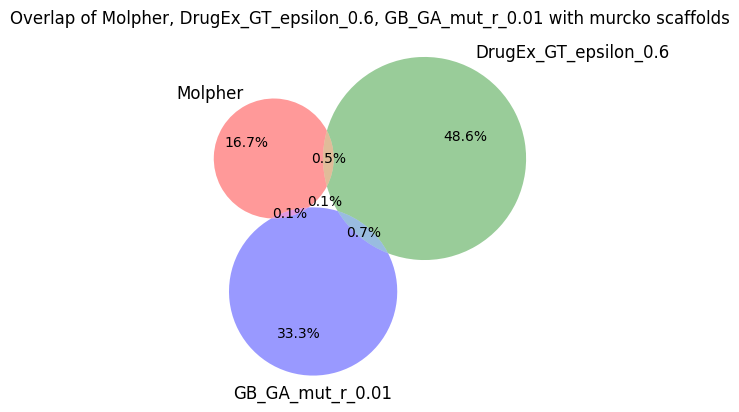

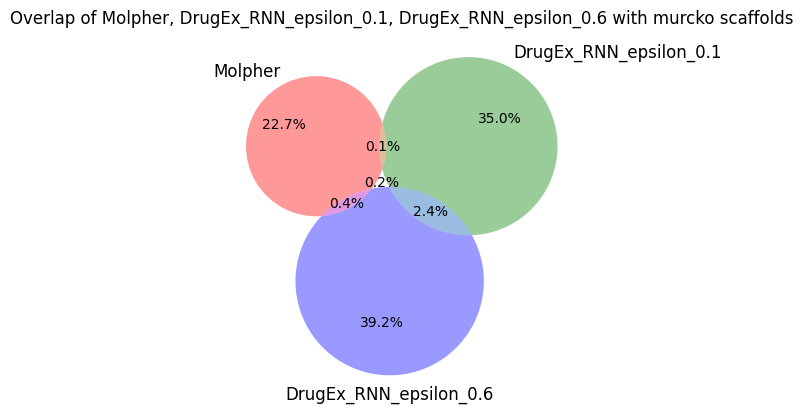

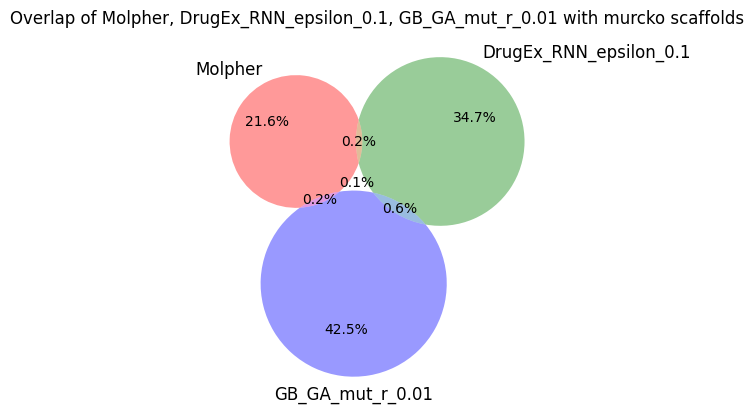

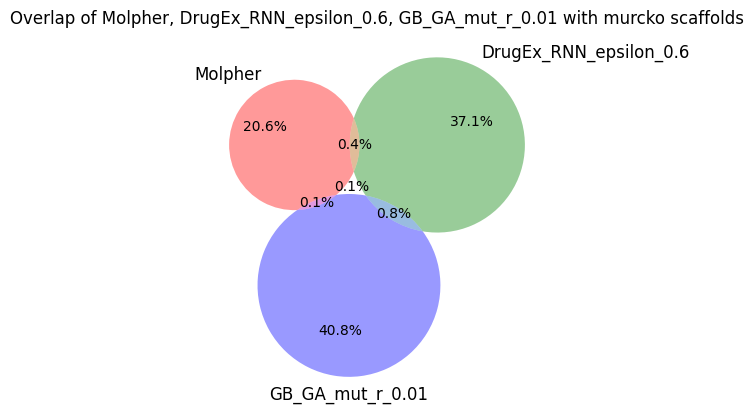

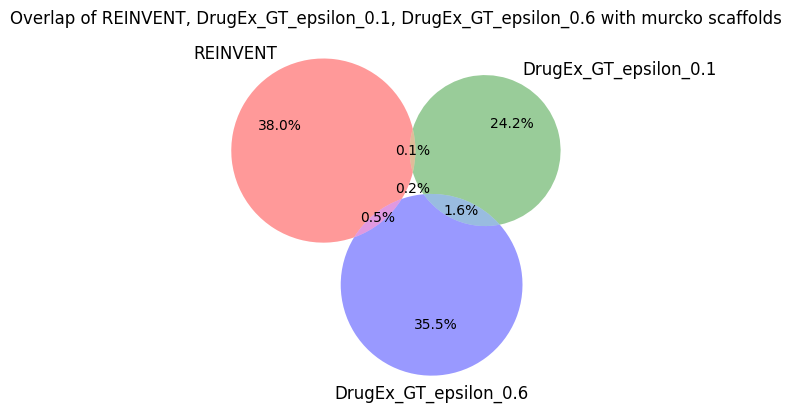

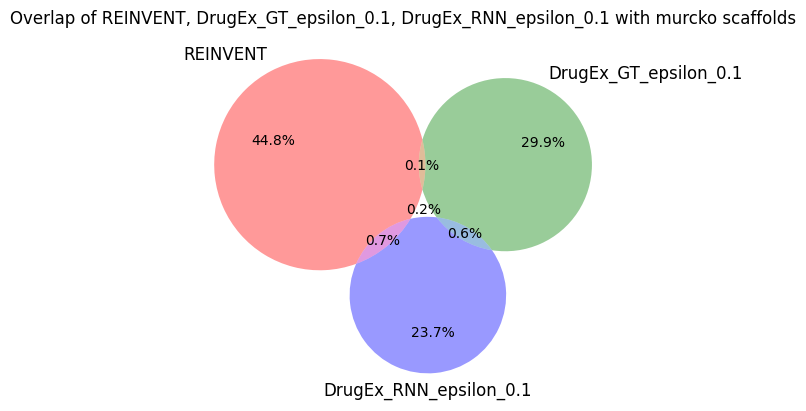

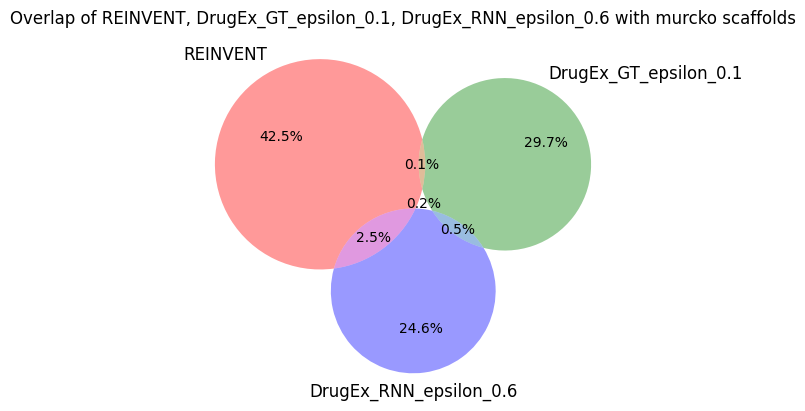

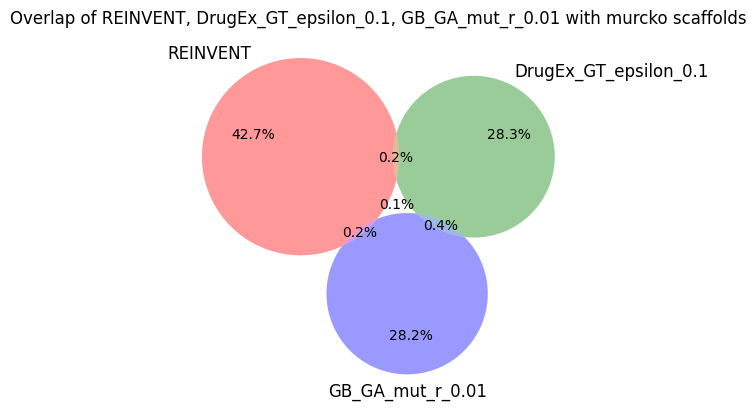

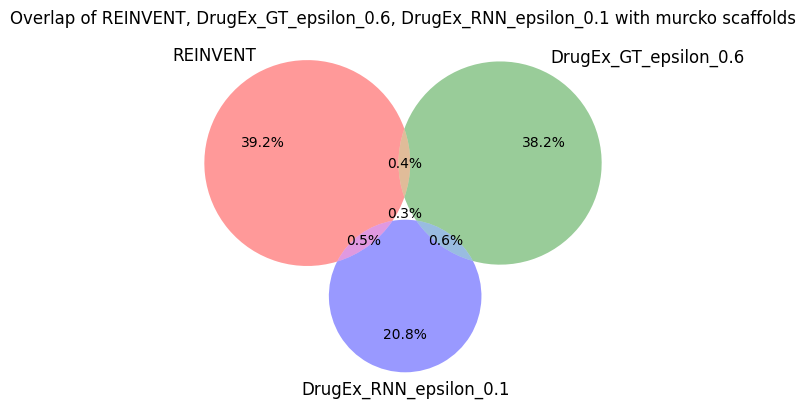

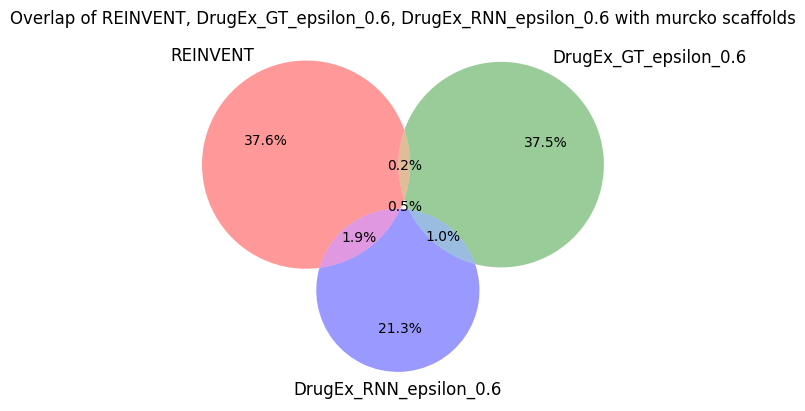

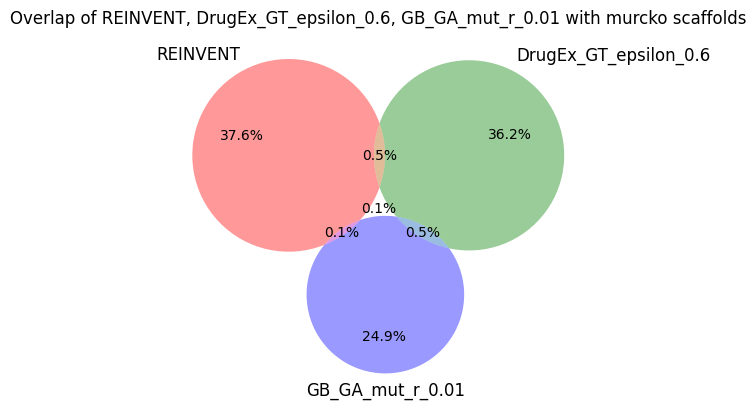

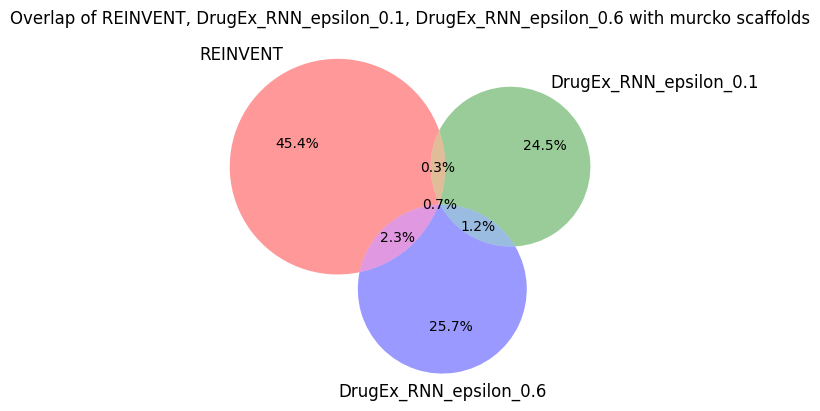

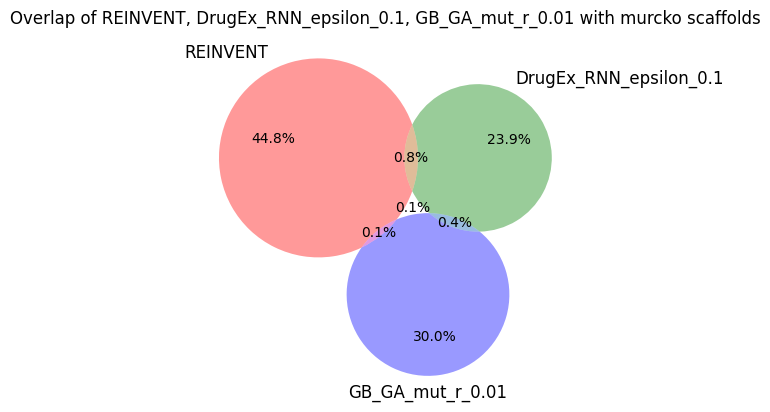

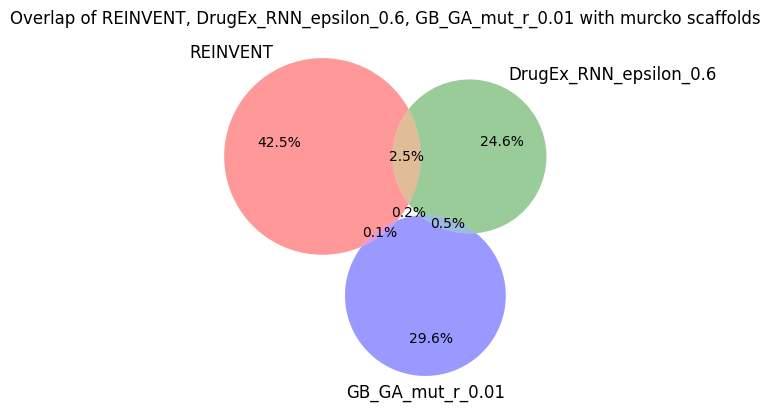

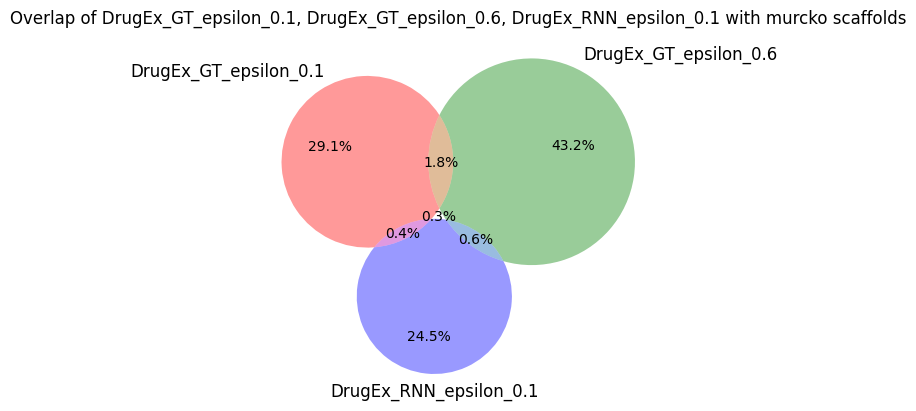

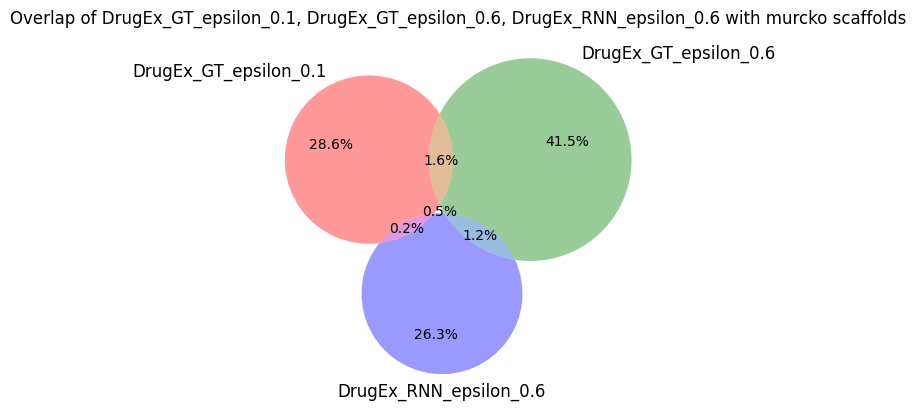

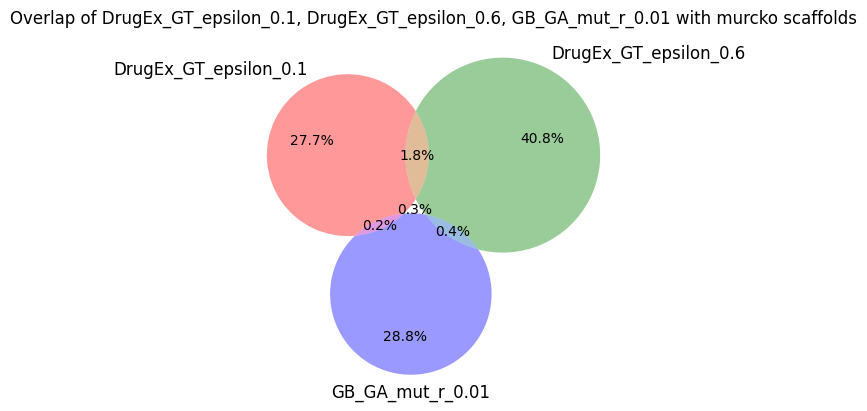

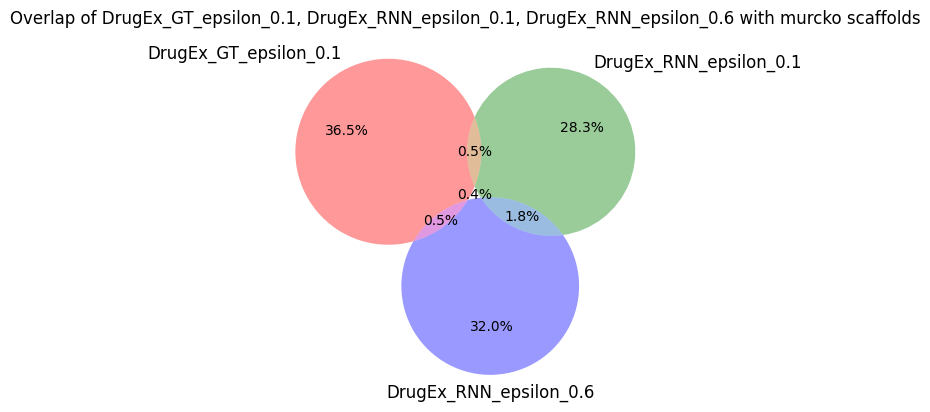

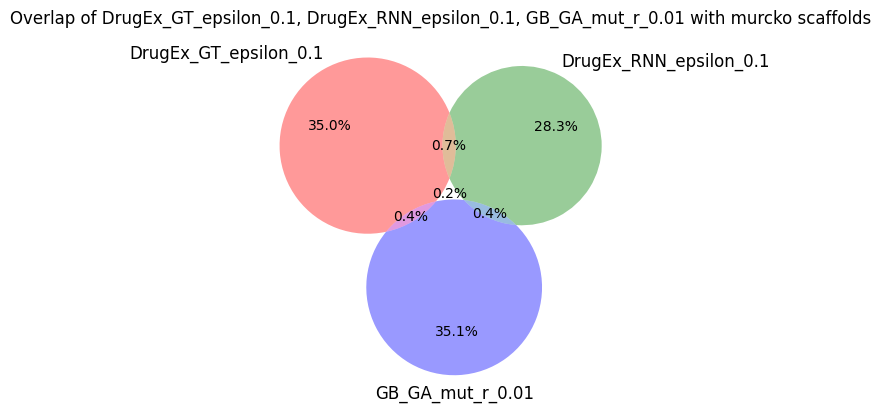

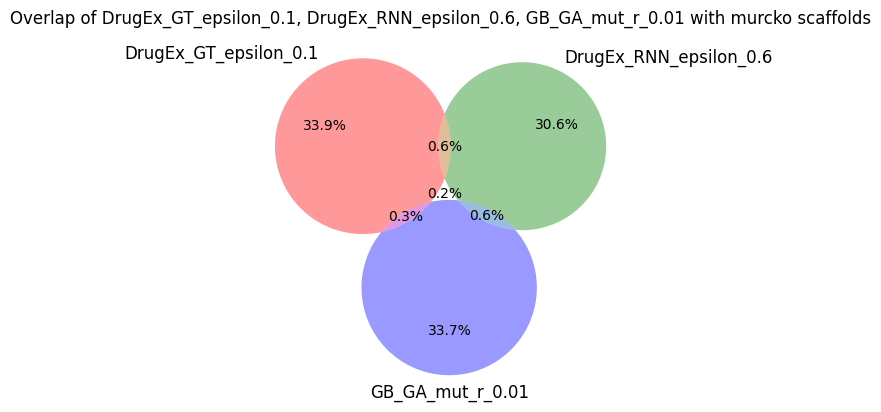

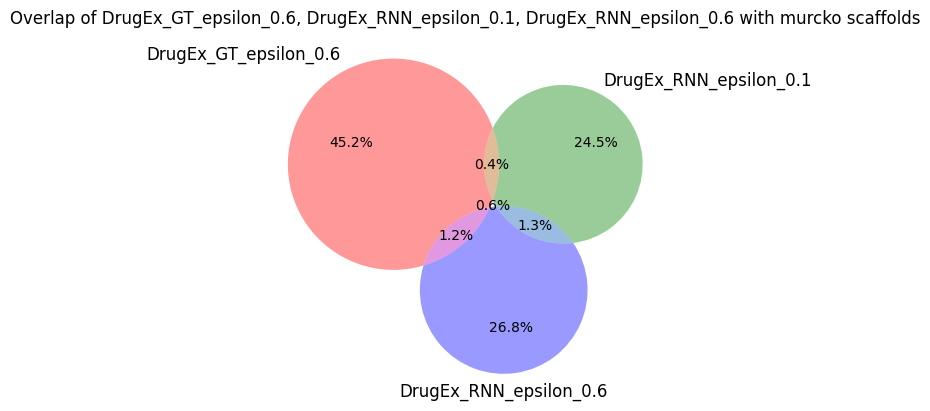

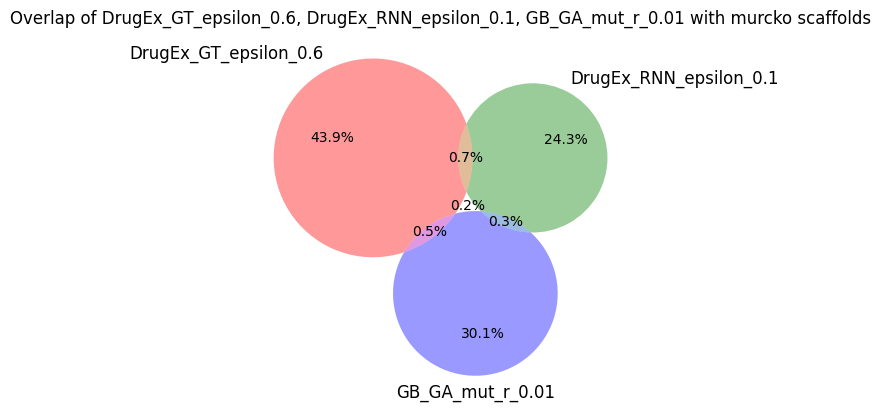

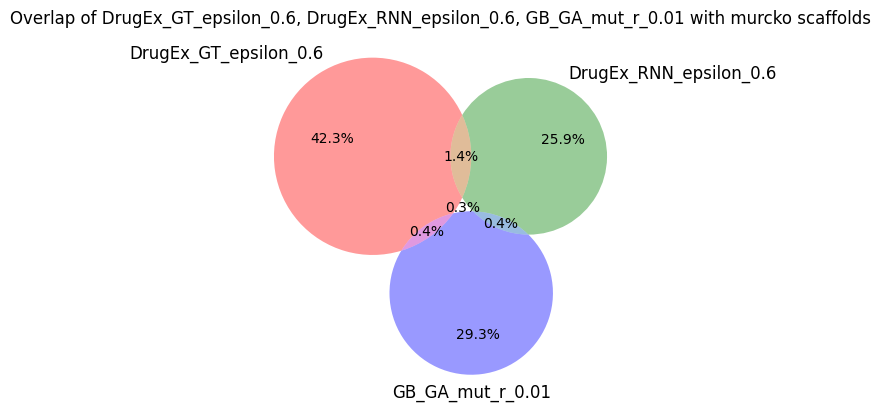

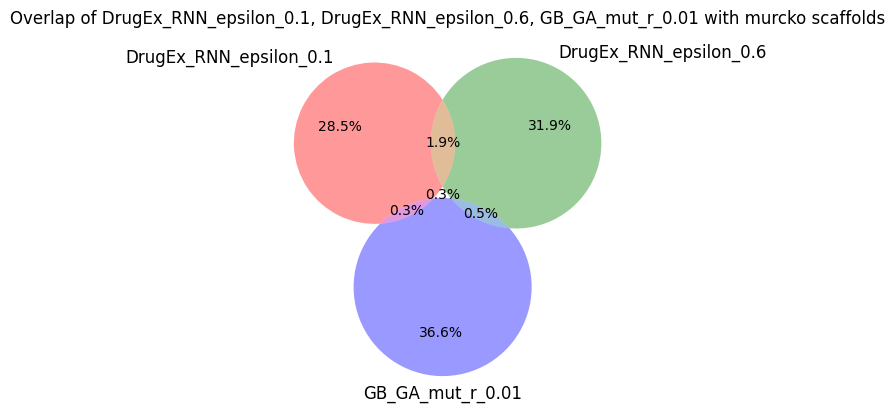

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
from itertools import combinations

# Načítání souborů do množin
generators = ['Molpher', 'REINVENT', 'DrugEx_GT_epsilon_0.1', 
              'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN_epsilon_0.1', 
              'DrugEx_RNN_epsilon_0.6', 'GB_GA_mut_r_0.01']
scaffold_sets = {}
for type_scaf in ['csk', 'murcko']:
    # Načtení dat do množin
    for generator in generators:
        scaffold_sets[generator] = set()
        for num in range(5):  # pro čísla clusteru 0-4
            file_path = f"data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/dis/{generator}/scaffolds_of_output_set_cluster_{num}_dis_{generator}.csv"
            try:
                df = pd.read_csv(file_path, header=None)
                scaffold_sets[generator].update(df[0].tolist())
            except FileNotFoundError:
                print(f"Soubor {file_path} nenalezen!")
    
    # Funkce pro vykreslení Vennova diagramu s procenty
    def draw_venn_multiple(sets_dict, subset_keys, title):
        # Vybrané množiny
        subset_dict = {k: sets_dict[k] for k in subset_keys}
        subsets = [subset_dict[key] for key in subset_keys]
    
        # Spočítání celkového počtu jedinečných prvků
        total_unique = len(set.union(*subsets))
    
        # Výpočet velikostí množin a jejich překryvů
        counts = {
            '100': len(subsets[0] - subsets[1] - subsets[2]),
            '010': len(subsets[1] - subsets[0] - subsets[2]),
            '001': len(subsets[2] - subsets[0] - subsets[1]),
            '110': len(subsets[0] & subsets[1] - subsets[2]),
            '101': len(subsets[0] & subsets[2] - subsets[1]),
            '011': len(subsets[1] & subsets[2] - subsets[0]),
            '111': len(subsets[0] & subsets[1] & subsets[2]),
        }
    
        # Převod na procenta
        counts_percentage = {k: (v / total_unique * 100 if total_unique > 0 else 0) for k, v in counts.items()}
    
        # Vytvoření Vennova diagramu
        venn = venn3(subsets=[subsets[0], subsets[1], subsets[2]], set_labels=subset_keys)
    
        # Nastavení procentuálních hodnot
        for region in counts:
            label = venn.get_label_by_id(region)
            if label:
                label.set_text(f"{counts_percentage[region]:.1f}%")
    
        plt.title(title)
    
        subsets_str = '_'.join(subset_keys)
    
        plt.savefig(f'img/overlaps/triples/{type_scaf}/overlaps_{subsets_str}_persentage.png')
        plt.show()
    
    # Vykreslení Vennova diagramu pro všechny trojice generátorů
    for comb in combinations(generators, 3):  # Vybíráme trojice
        draw_venn_multiple(scaffold_sets, comb, f"Overlap of {', '.join(comb)} with {type_scaf} scaffolds")
        


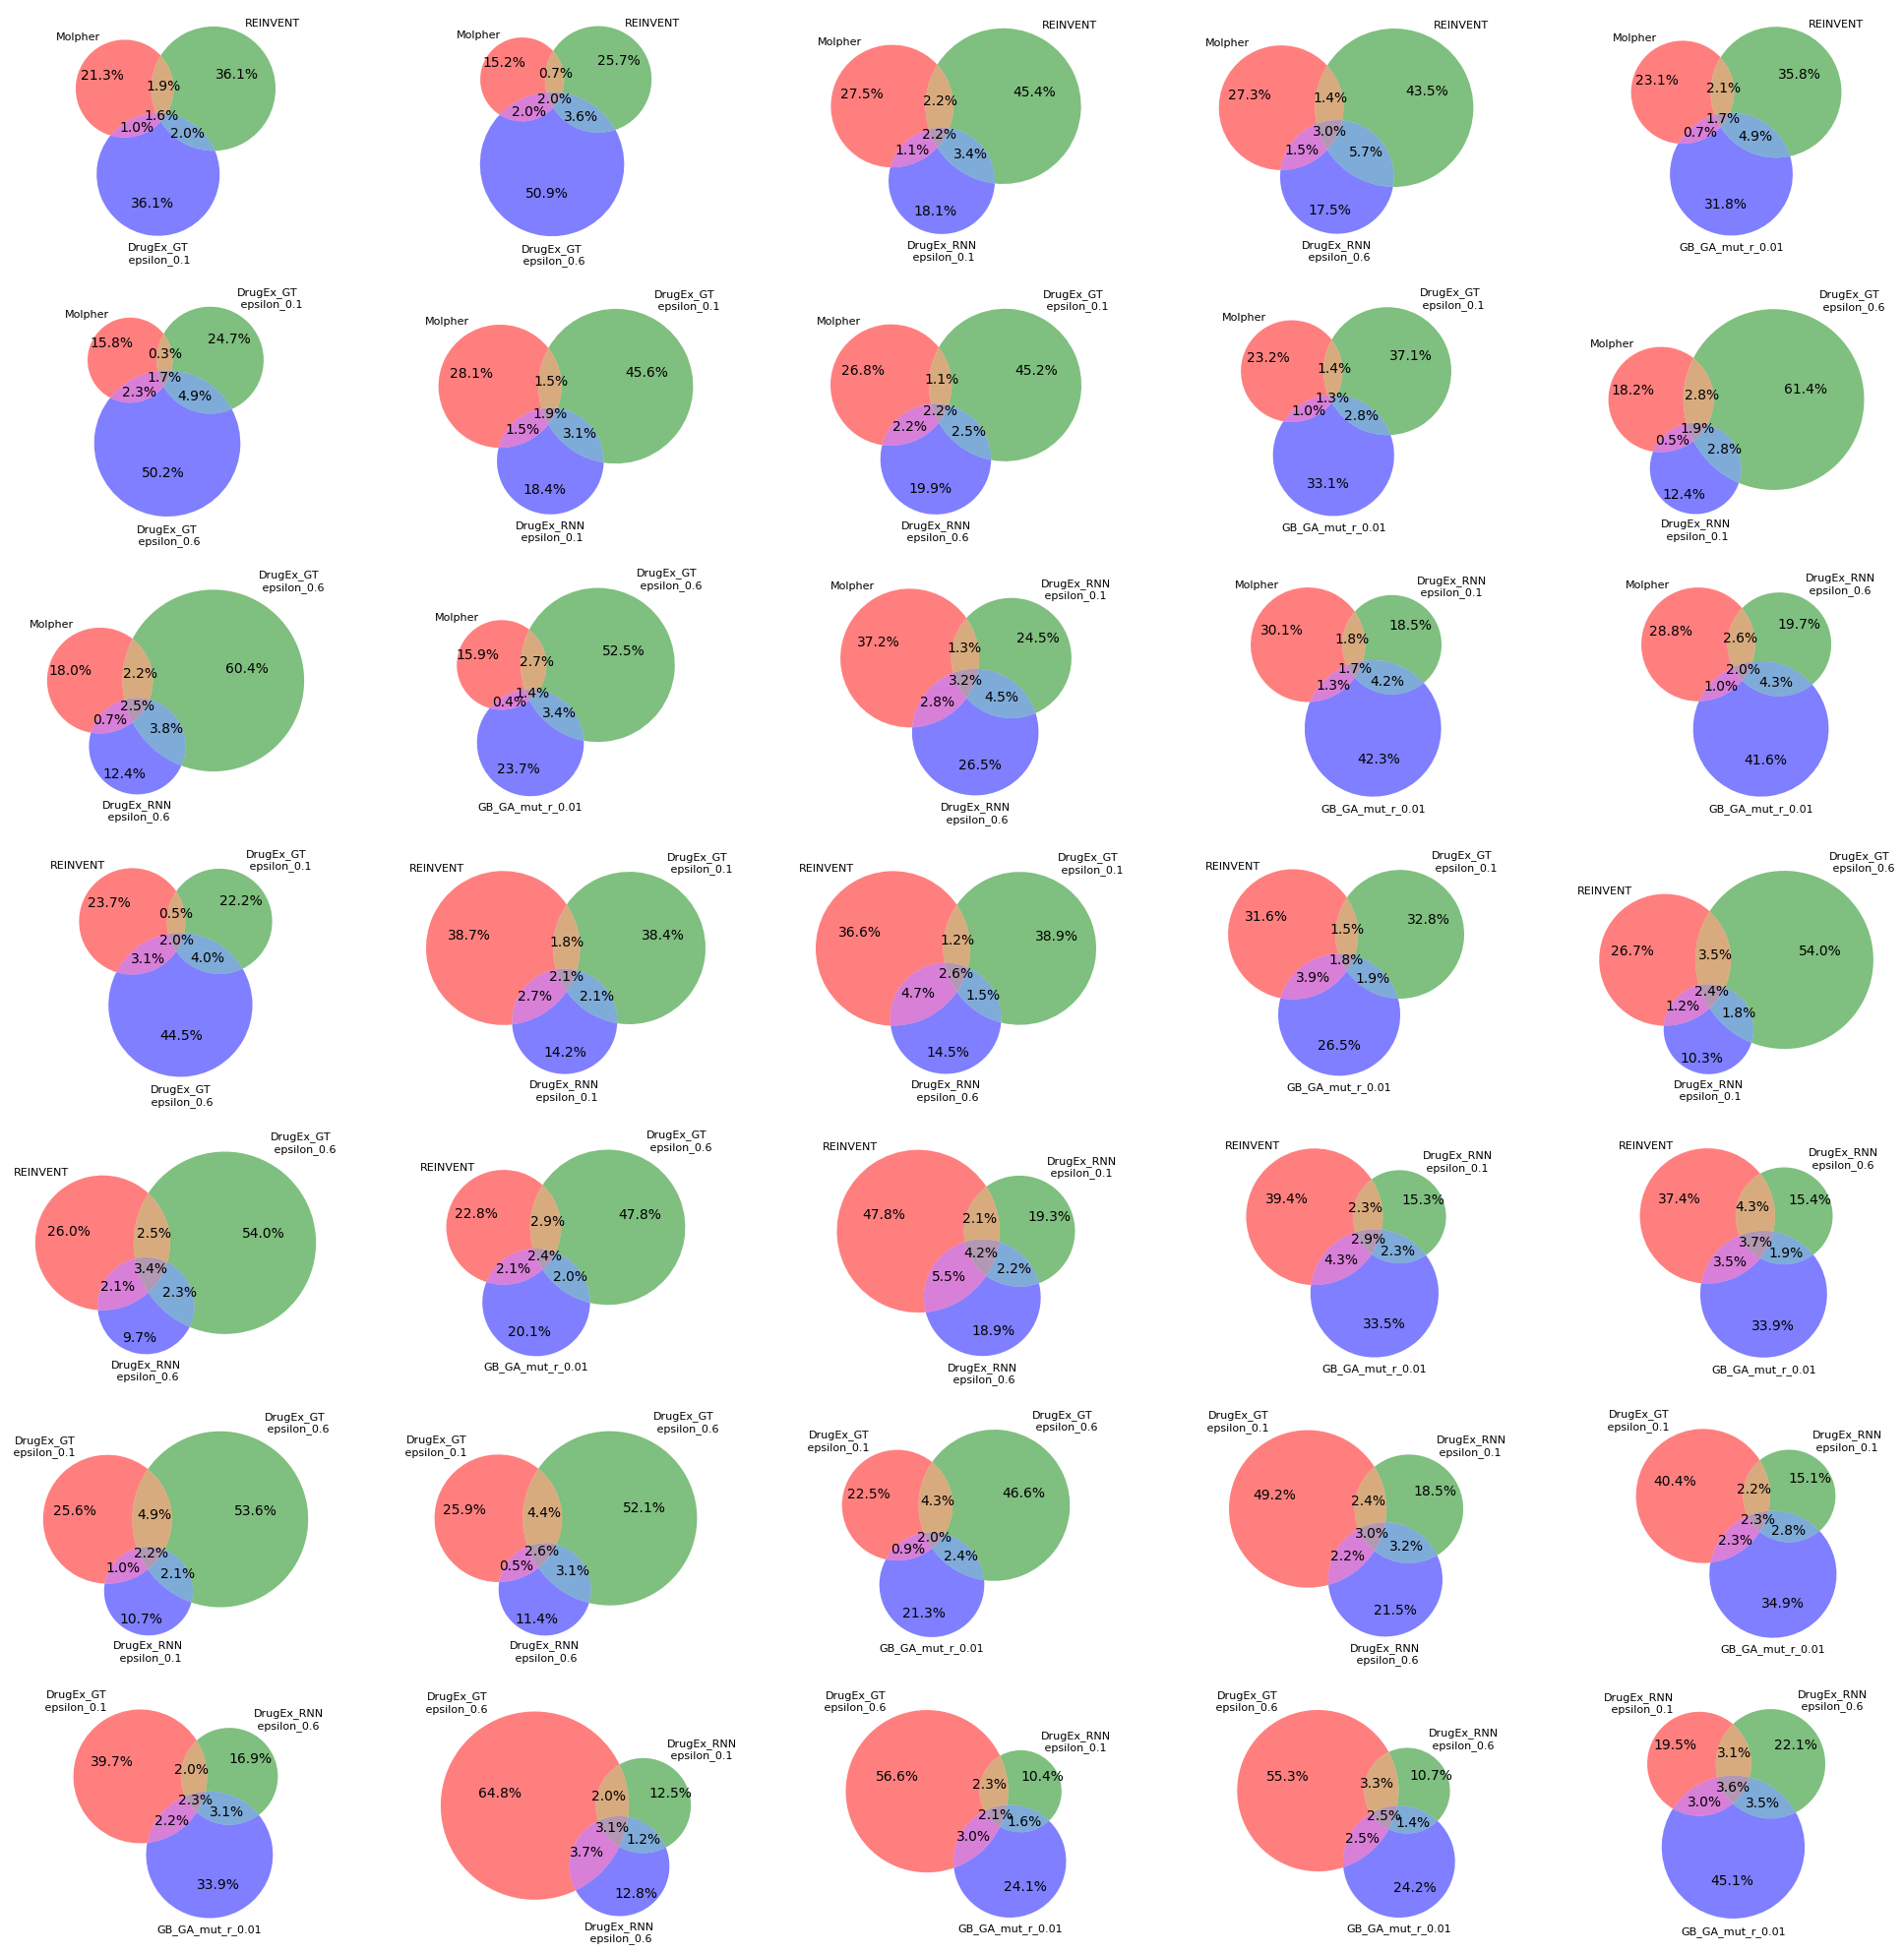

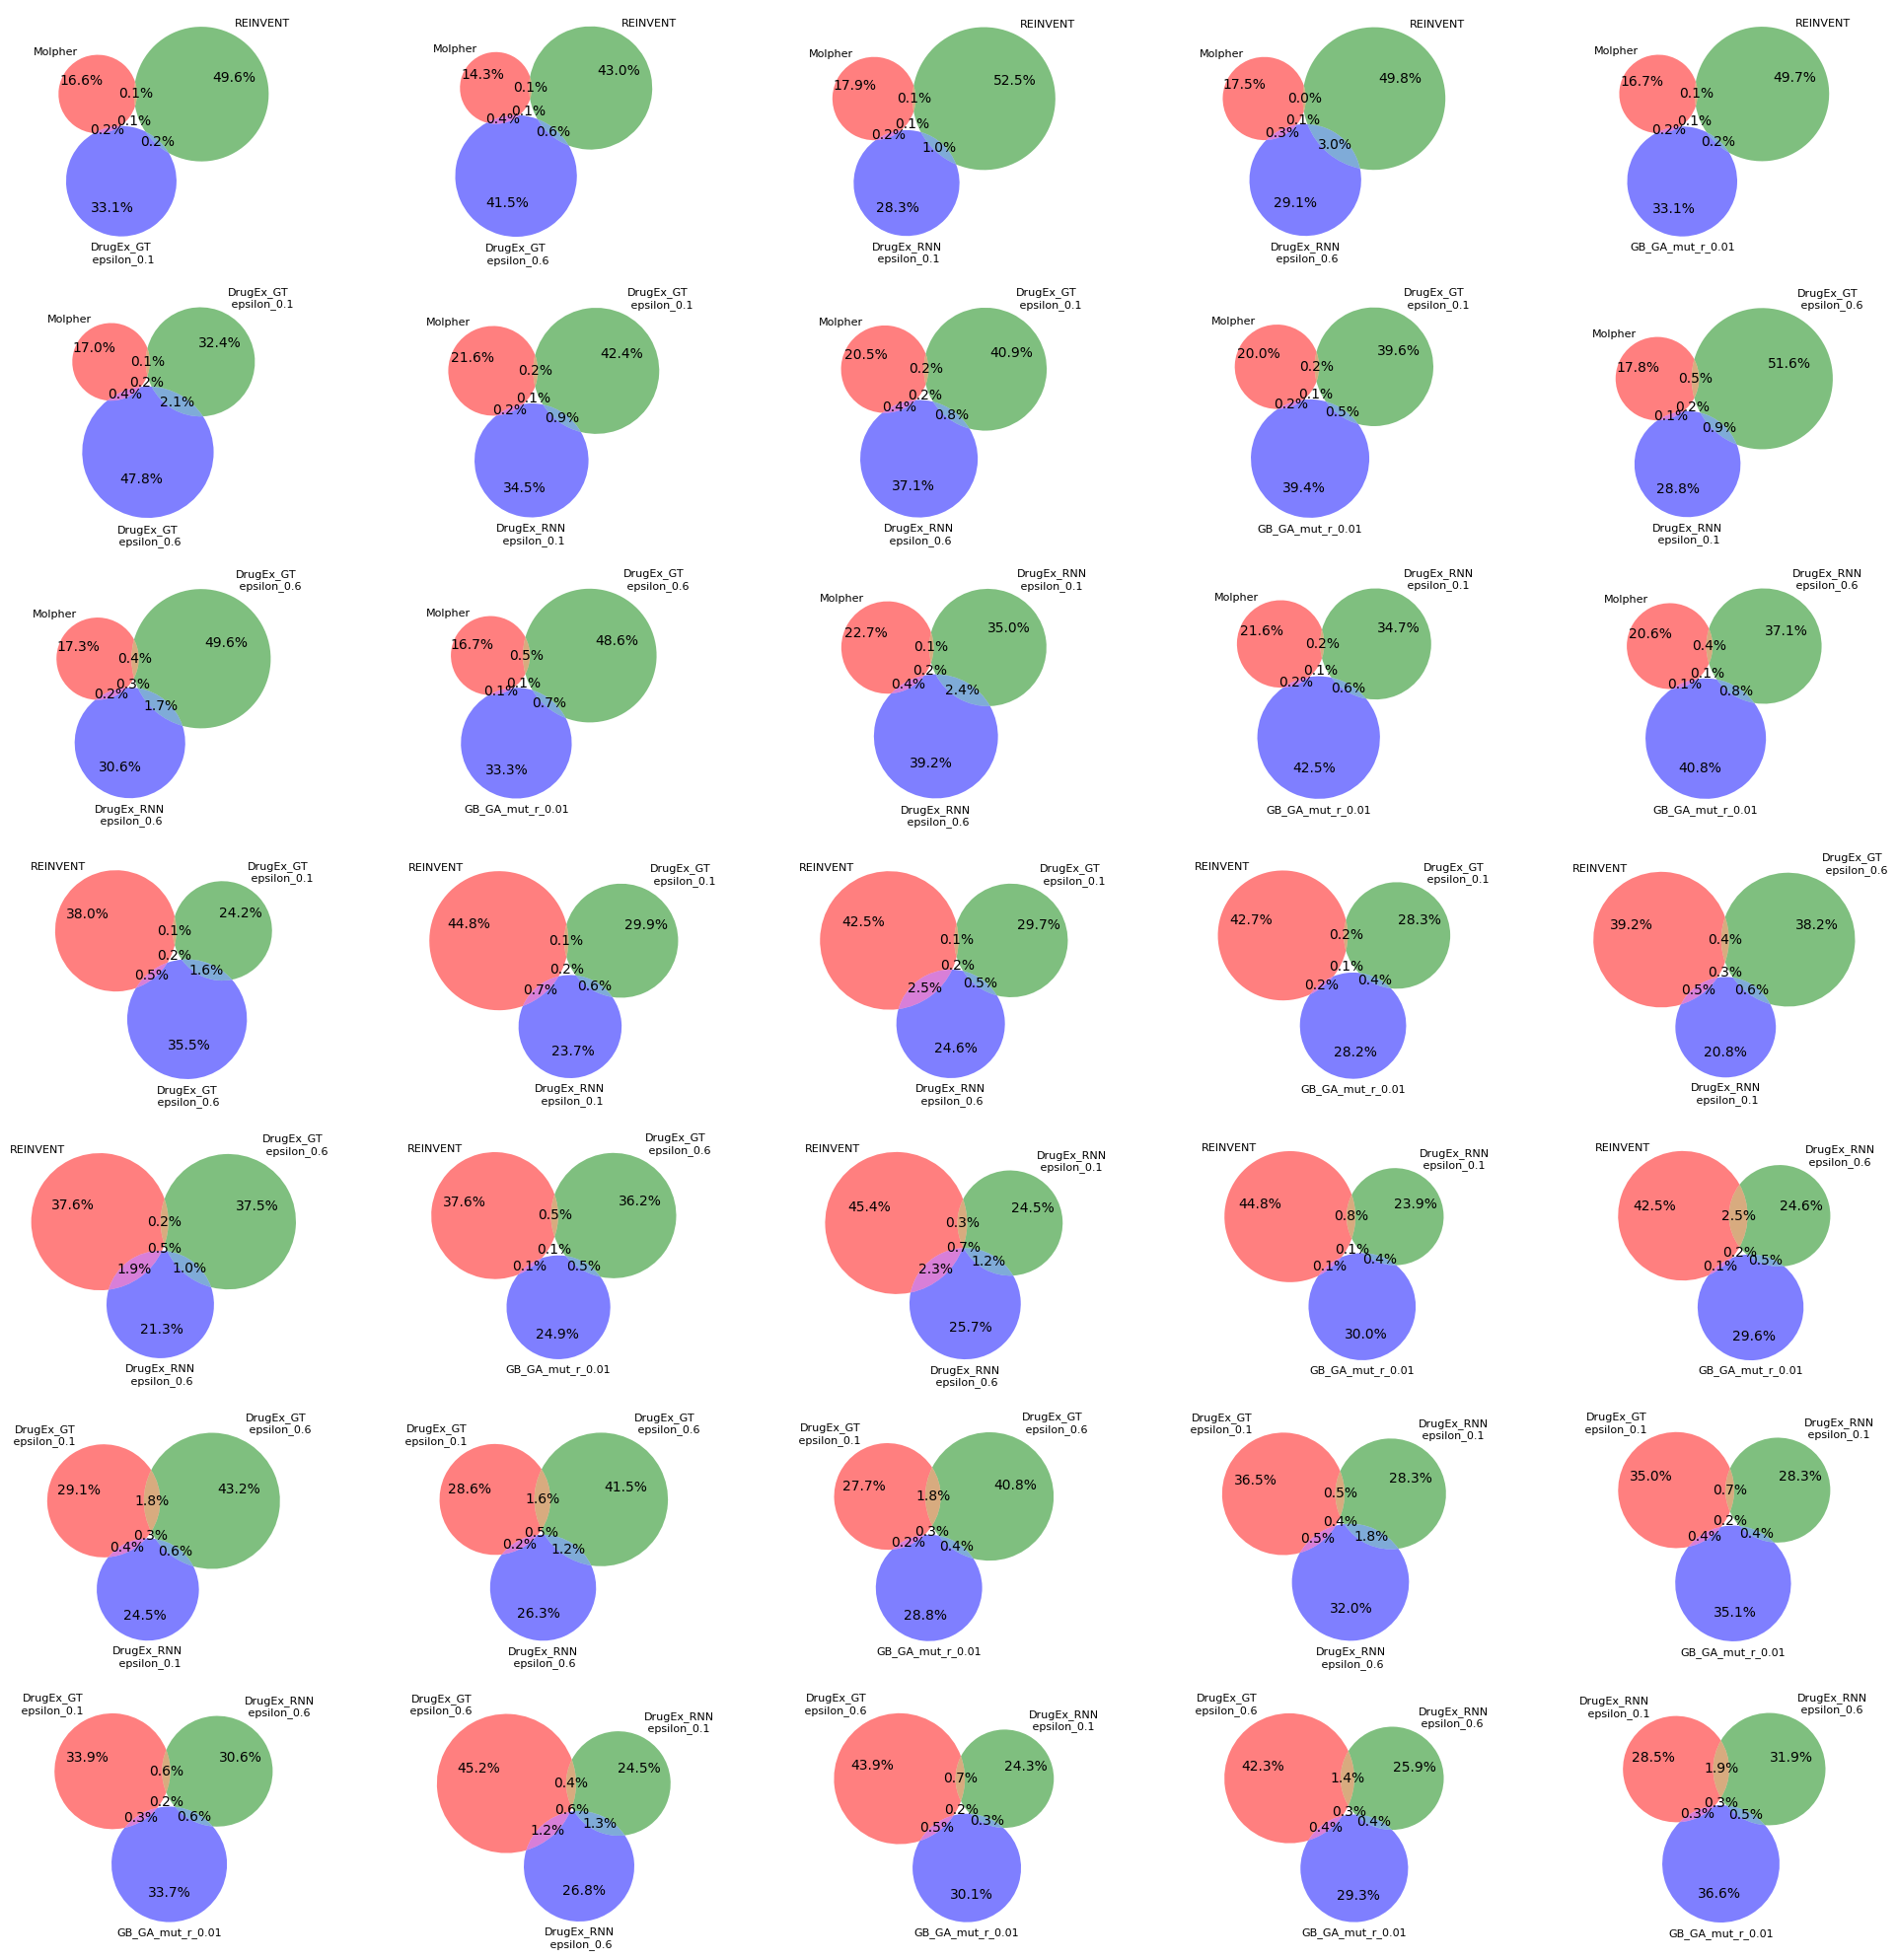

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
from itertools import combinations

# Načítání souborů do množin
generators = ['Molpher', 'REINVENT', 'DrugEx_GT_epsilon_0.1', 
              'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN_epsilon_0.1', 
              'DrugEx_RNN_epsilon_0.6', 'GB_GA_mut_r_0.01']
scaffold_sets = {}
for type_scaf in ['csk','murcko']:
    # Načtení dat do množin
    for generator in generators:
        scaffold_sets[generator] = set()
        for num in range(5):  # pro čísla clusteru 0-4
            file_path = f"data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/dis/{generator}/scaffolds_of_output_set_cluster_{num}_dis_{generator}.csv"
            try:
                df = pd.read_csv(file_path, header=None)
                scaffold_sets[generator].update(df[0].tolist())
            except FileNotFoundError:
                print(f"Soubor {file_path} nenalezen!")
    
    # Funkce pro vykreslení Vennova diagramu s procenty
    def draw_venn_multiple(sets_dict, subset_keys, title, ax):
        # Vybrané množiny
        subset_dict = {k: sets_dict[k] for k in subset_keys}
        subsets = [subset_dict[key] for key in subset_keys]
    
        # Spočítání celkového počtu jedinečných prvků
        total_unique = len(set.union(*subsets))
    
        # Výpočet velikostí množin a jejich překryvů
        counts = {
            '100': len(subsets[0] - subsets[1] - subsets[2]),
            '010': len(subsets[1] - subsets[0] - subsets[2]),
            '001': len(subsets[2] - subsets[0] - subsets[1]),
            '110': len(subsets[0] & subsets[1] - subsets[2]),
            '101': len(subsets[0] & subsets[2] - subsets[1]),
            '011': len(subsets[1] & subsets[2] - subsets[0]),
            '111': len(subsets[0] & subsets[1] & subsets[2]),
        }
    
        # Převod na procenta
        counts_percentage = {k: (v / total_unique * 100 if total_unique > 0 else 0) for k, v in counts.items()}
    
        # Vytvoření Vennova diagramu
        venn = venn3(subsets=[subsets[0], subsets[1], subsets[2]], set_labels=subset_keys, alpha=0.5, ax=ax)
    
        # Nastavení procentuálních hodnot
        for region in counts:
            label = venn.get_label_by_id(region)
            if label:
                label.set_text(f"{counts_percentage[region]:.1f}%")
                
                # Nastavení velikosti písma pro popisky generátorů
        for label in venn.set_labels:
            label.set_fontsize(8)  # Změna velikosti písma
            label.set_text(label.get_text().replace("_epsilon", "\n epsilon"))

    
        #ax.set_title(title)
    
    # Vytvoření figure pro subploty
    fig, axes = plt.subplots(7, 5, figsize=(20, 20))  # 3x3 pro všechny trojice generátorů
    axes = axes.flatten()  # Převedení do jednorozměrného pole pro snadnější iteraci
    
    # Vykreslení Vennova diagramu pro všechny trojice generátorů
    plot_index = 0
    for comb in combinations(generators, 3):  # Vybíráme trojice
        draw_venn_multiple(scaffold_sets, comb, f"Overlap of {', '.join(comb)}", axes[plot_index])
        plot_index += 1
    
    # Přizpůsobení rozložení
    plt.tight_layout()
    plt.savefig(f'img/overlaps/triples/combined_overlaps_{type_scaf}.png', dpi=500)
    plt.savefig(f"img/overlaps/triples/combined_overlaps_{type_scaf}.svg", format="svg")

    plt.show()
